In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
#Importing necessary libraries
import pandas as pd

In [3]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)  # TensorFlow sürümünü kontrol et
print("GPU Available:", tf.config.list_physical_devices('GPU'))  # GPU listesi

TensorFlow Version: 2.10.1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
#Creating a dataframe named df from csv data with the Pandas library
df = pd.read_csv(r"C:\Users\alium\jupyter_project\CDTP\Vehicle/car_train.csv")

In [5]:
#Showing the names, numbers and empty values of the given types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
#First five parts of the data
df.head()

Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   Width  \
0   87 bhp @ 6000 rpm       109 Nm @ 4500 rpm        FWD  3990.0  1680.0   
1   74 bhp @ 4000 rpm       190 Nm @ 2000 rpm        FWD  3995.0  1695.0   
2   79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm        FWD  3585.0  1595.0   
3   82 bhp @ 6000 rpm       113 Nm @ 4200 rpm        FWD  3995.0  1745.0   
4  148 bhp @ 3400 rpm       343 Nm @ 1400 rpm        RWD  4735.0  1830.0   

   Height  Seating Capacity  Fuel Tank Capacity  
0  1505.0               5.0                35.0  
1  1555.0               5.0                42.0  
2  1550.0               5.0                35.0  
3  1510.0               5.0                37.0  
4  1795.0               7.0                55.0

In [7]:
df2 = df.copy()  # Create a copy of the original DataFrame

# Use regex to extract the first number appearing before any whitespace
df2['Engine'] = df2['Engine'].str.extract(r'(\d+)')  # Extract the first occurring number
df2['Max Power'] = df2['Max Power'].str.extract(r'(\d+)')
df2['Max Torque'] = df2['Max Torque'].str.extract(r'(\d+)')

# Convert extracted values to numeric format to avoid NaN errors
df2['Engine'] = pd.to_numeric(df2['Engine'], errors='coerce')
df2['Max Power'] = pd.to_numeric(df2['Max Power'], errors='coerce')
df2['Max Torque'] = pd.to_numeric(df2['Max Torque'], errors='coerce')


In [8]:
df2.select_dtypes(include=['int', 'float']).min()

Price                 49000.0
Year                   1988.0
Kilometer                 0.0
Engine                  624.0
Max Power                35.0
Max Torque               48.0
Length                 3099.0
Width                  1475.0
Height                 1165.0
Seating Capacity          2.0
Fuel Tank Capacity       15.0
dtype: float64

In [9]:
df2.select_dtypes(include=['int', 'float']).max()

Price                 35000000.0
Year                      2022.0
Kilometer              2000000.0
Engine                    6592.0
Max Power                  660.0
Max Torque                 780.0
Length                    5569.0
Width                     2220.0
Height                    1995.0
Seating Capacity             8.0
Fuel Tank Capacity         105.0
dtype: float64

In [10]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [11]:
df.isnull().mean() * 100

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
dtype: float64

In [12]:
# Symbols to search for
symbols = ['cc', 'bhp', '@', 'rpm', '-']

# Counting occurrences of each symbol in each column and aggregating the result
symbol_counts_per_column = {
    column: sum(
        df[column].astype(str).str.contains(symbol, na=False).sum() 
        for symbol in symbols
    ) 
    for column in df.columns
}

# Printing the total count for each column
for column, total_count in symbol_counts_per_column.items():
    if total_count > 0:
        print(f"Total count of symbols in column '{column}': {total_count}")

# Total number of rows in the DataFrame
total_rows = len(df)

# Printing the total count percentage for each column
for column, total_count in symbol_counts_per_column.items():
    if total_count > 0:
        percentage = (total_count / total_rows) * 100  # Convert to percentage
        print(f"Total count percentage of symbols in column '{column}': {percentage:.2f}%")



Total count of symbols in column 'Make': 174
Total count of symbols in column 'Model': 657
Total count of symbols in column 'Location': 1
Total count of symbols in column 'Engine': 1979
Total count of symbols in column 'Max Power': 5677
Total count of symbols in column 'Max Torque': 3830
Total count percentage of symbols in column 'Make': 8.45%
Total count percentage of symbols in column 'Model': 31.91%
Total count percentage of symbols in column 'Location': 0.05%
Total count percentage of symbols in column 'Engine': 96.11%
Total count percentage of symbols in column 'Max Power': 275.72%
Total count percentage of symbols in column 'Max Torque': 186.01%


In [13]:
df2["Model"] = df["Model"].apply(lambda x: x.split()[0])

In [14]:
from sklearn.preprocessing import LabelEncoder
# Define the object columns you want to encode
object_columns = [
    'Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 
    'Color', 'Owner', 'Seller Type', 'Drivetrain'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column and print the mapping
for column in object_columns:
    # Fit the encoder and transform the data
    df2[column] = label_encoder.fit_transform(df2[column])
    
    #Print the categories and their corresponding numerical labels
    print(f"Mapping for column: {column}")
    for category, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f'{category}: {label}')
    print("\n")

Mapping for column: Make
Audi: 0
BMW: 1
Chevrolet: 2
Datsun: 3
Ferrari: 4
Fiat: 5
Ford: 6
Honda: 7
Hyundai: 8
Isuzu: 9
Jaguar: 10
Jeep: 11
Kia: 12
Lamborghini: 13
Land Rover: 14
Lexus: 15
MG: 16
MINI: 17
Mahindra: 18
Maruti Suzuki: 19
Maserati: 20
Mercedes-Benz: 21
Mitsubishi: 22
Nissan: 23
Porsche: 24
Renault: 25
Rolls-Royce: 26
Skoda: 27
Ssangyong: 28
Tata: 29
Toyota: 30
Volkswagen: 31
Volvo: 32


Mapping for column: Model
2: 0
3-Series: 1
488: 2
5-Series: 3
6-Series: 4
7-Series: 5
718: 6
911: 7
A-Class: 8
A3: 9
A4: 10
A6: 11
A7: 12
A8: 13
Accent: 14
Accord: 15
Alcazar: 16
Alto: 17
Altroz: 18
Alturas: 19
Amaze: 20
Ameo: 21
Aspire: 22
Astor: 23
Aura: 24
B-class: 25
BR-V: 26
Baleno: 27
Beat: 28
Bolero: 29
Brio: 30
C-Class: 31
C-Coupe: 32
CLA: 33
CLS: 34
CR-V: 35
Camry: 36
Captiva: 37
Carnival: 38
Cayenne: 39
Celerio: 40
Ciaz: 41
City: 42
Civic: 43
Commuter: 44
Compass: 45
Cooper: 46
Corolla: 47
Countryman: 48
Creta: 49
Cruze: 50
DZire: 51
Discovery: 52
Duster: 53
E-Class: 54
ES: 55
Eco

In [15]:
mode_values = df2.mode()

print(mode_values)

   Make  Model   Price  Year  Kilometer  Fuel Type  Transmission  Location  \
0    19    150  425000  2018      65000          2             1        45   

   Color  Owner  Seller Type  Engine  Max Power  Max Torque  Drivetrain  \
0     15      1            2  1197.0       89.0       200.0           1   

   Length   Width  Height  Seating Capacity  Fuel Tank Capacity  
0  3995.0  1695.0  1475.0               5.0                35.0  


In [16]:
# Select rows 33, 69, 94, 108, and 127 using .iloc[]
rows_to_select = df2.iloc[[33, 69, 94, 108, 127]]  # pandas iloc uses zero-based indexing, so we are selecting the rows based on their 0-based positions

print(rows_to_select)

     Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
33      7     35   860000  2013      67000          6             0        45   
69      0     10  1250000  2012      50000          2             0        45   
94     21     74  3900000  2018      83400          2             0        27   
108     7     30   229000  2013      38175          6             1        36   
127    29    111  1375000  2021      16000          3             0        45   

     Color  Owner  Seller Type  Engine  Max Power  Max Torque  Drivetrain  \
33       4      1            2     NaN        NaN         NaN           3   
69      15      1            2     NaN        NaN         NaN           3   
94      15      3            2     NaN        NaN         NaN           3   
108      2      1            2     NaN        NaN         NaN           3   
127     15      1            2     NaN        NaN         NaN           1   

     Length   Width  Height  Seating Capacity  Fue

In [17]:
# Fill NaN values with the mode of each column
df2_filled = df2.fillna(mode_values)

# Select float columns
float_columns = df2.select_dtypes(include=['float64'])

# Fill NaN in float columns with their mode
mode_values_f = float_columns.mode().iloc[0]
df2[float_columns.columns] = float_columns.fillna(mode_values_f)

# Drivetrain nan value fill mode value
mode_drivetrain = df2['Drivetrain'].mode()[0]  
df2.loc[df2['Drivetrain'] == 3, 'Drivetrain'] = mode_drivetrain

rows_to_select = df2.iloc[[33, 69, 94, 108, 127]]
print(rows_to_select)

     Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
33      7     35   860000  2013      67000          6             0        45   
69      0     10  1250000  2012      50000          2             0        45   
94     21     74  3900000  2018      83400          2             0        27   
108     7     30   229000  2013      38175          6             1        36   
127    29    111  1375000  2021      16000          3             0        45   

     Color  Owner  Seller Type  Engine  Max Power  Max Torque  Drivetrain  \
33       4      1            2  1197.0       89.0       200.0           1   
69      15      1            2  1197.0       89.0       200.0           1   
94      15      3            2  1197.0       89.0       200.0           1   
108      2      1            2  1197.0       89.0       200.0           1   
127     15      1            2  1197.0       89.0       200.0           1   

     Length   Width  Height  Seating Capacity  Fue

In [18]:
df2.head()

Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
0     7     20   505000  2017      87150          6             1        56   
1    19    150   450000  2014      75000          2             1        40   
2     8    194   220000  2011      67000          6             1        39   
3    30     78   799000  2019      37500          6             1        41   
4    30     89  1950000  2018      69000          2             1        45   

   Color  Owner  Seller Type  Engine  Max Power  Max Torque  Drivetrain  \
0      7      1            1  1198.0       87.0       109.0           1   
1     15      3            2  1248.0       74.0       190.0           1   
2      8      1            2  1197.0       79.0       112.0           1   
3     13      1            2  1197.0       82.0       113.0           1   
4      7      1            2  2393.0      148.0       343.0           2   

   Length   Width  Height  Seating Capacity  Fuel Tank Capacity  
0  3990.0  1680.0  1505.0               5.0                35.0  
1  3995.0  1695.0  1555.0               5.0                42.0  
2  3585.0  1595.0  1550.0               5.0                35.0  
3  3995.0  1745.0  1510.0               5.0                37.0  
4  4735.0  1830.0  1795.0               7.0                55.0

In [19]:
df2.insert(df2.columns.get_loc('Year'), 'Age', 2022 - df2['Year'])
df2.drop(columns='Year', inplace=True)

In [20]:
# Add an 'id' column to df2 (using the row index)
df2['id'] = df2.index

# List of columns to apply IQR filtering on
selected_columns = ['Age', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# Calculate Q1, Q3 and IQR for selected columns
Q1 = df2[selected_columns].quantile(0.15)
Q3 = df2[selected_columns].quantile(0.85)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a copy of the original DataFrame
df_merged = df2.copy()

# Remove rows outside the bounds for each column
for col in selected_columns:
    mask = (df_merged[col] < lower_bound[col]) | (df_merged[col] > upper_bound[col])
    df_merged = df_merged[~mask]

# Display DataFrame info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1982 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1982 non-null   int32  
 1   Model               1982 non-null   int32  
 2   Price               1982 non-null   int64  
 3   Age                 1982 non-null   int64  
 4   Kilometer           1982 non-null   int64  
 5   Fuel Type           1982 non-null   int32  
 6   Transmission        1982 non-null   int32  
 7   Location            1982 non-null   int32  
 8   Color               1982 non-null   int32  
 9   Owner               1982 non-null   int32  
 10  Seller Type         1982 non-null   int32  
 11  Engine              1982 non-null   float64
 12  Max Power           1982 non-null   float64
 13  Max Torque          1982 non-null   float64
 14  Drivetrain          1982 non-null   int32  
 15  Length              1982 non-null   float64
 16  Width      

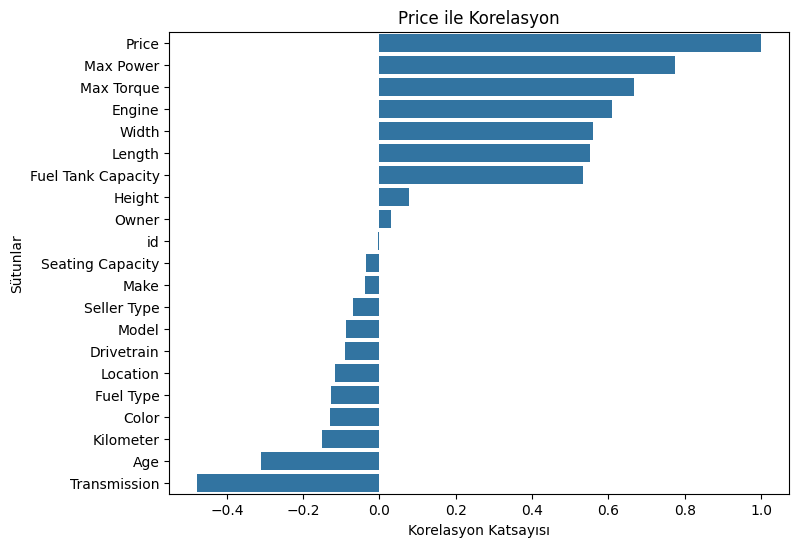

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# "Price" ile diğer sütunlar arasındaki korelasyonu hesapla
correlation_with_price = df2.corr(numeric_only=True)["Price"].sort_values(ascending=False)

# Korelasyonu görselleştir
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index)
plt.title("Price ile Korelasyon")
plt.xlabel("Korelasyon Katsayısı")
plt.ylabel("Sütunlar")
plt.show()


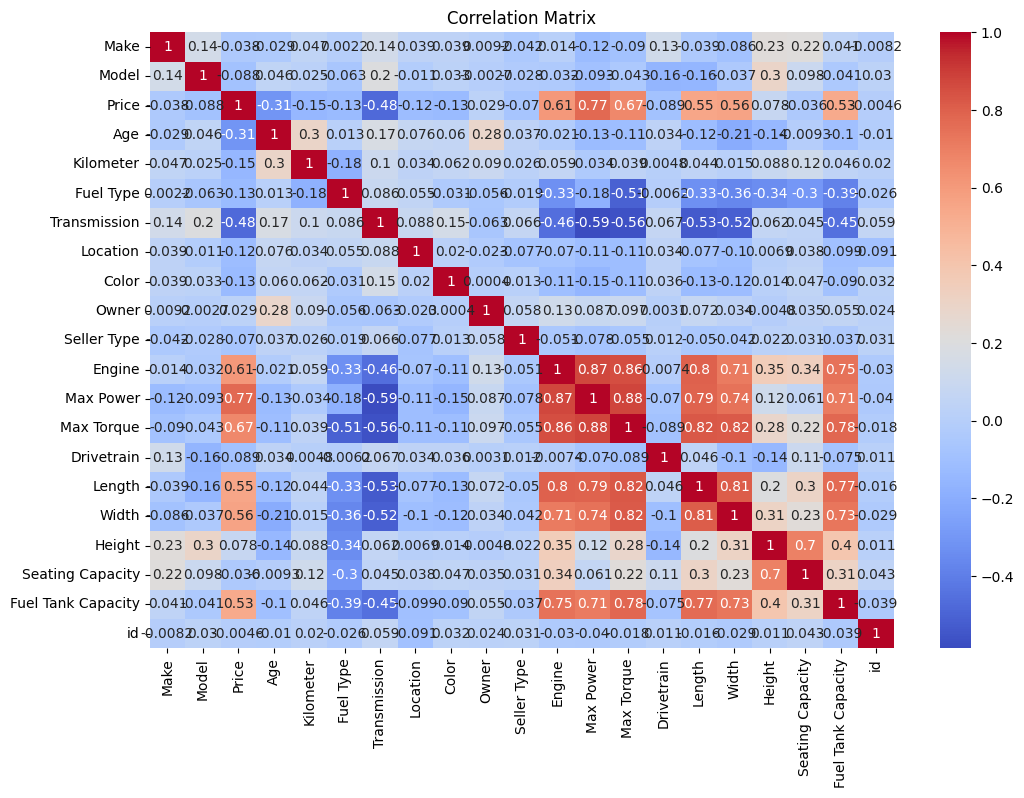

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


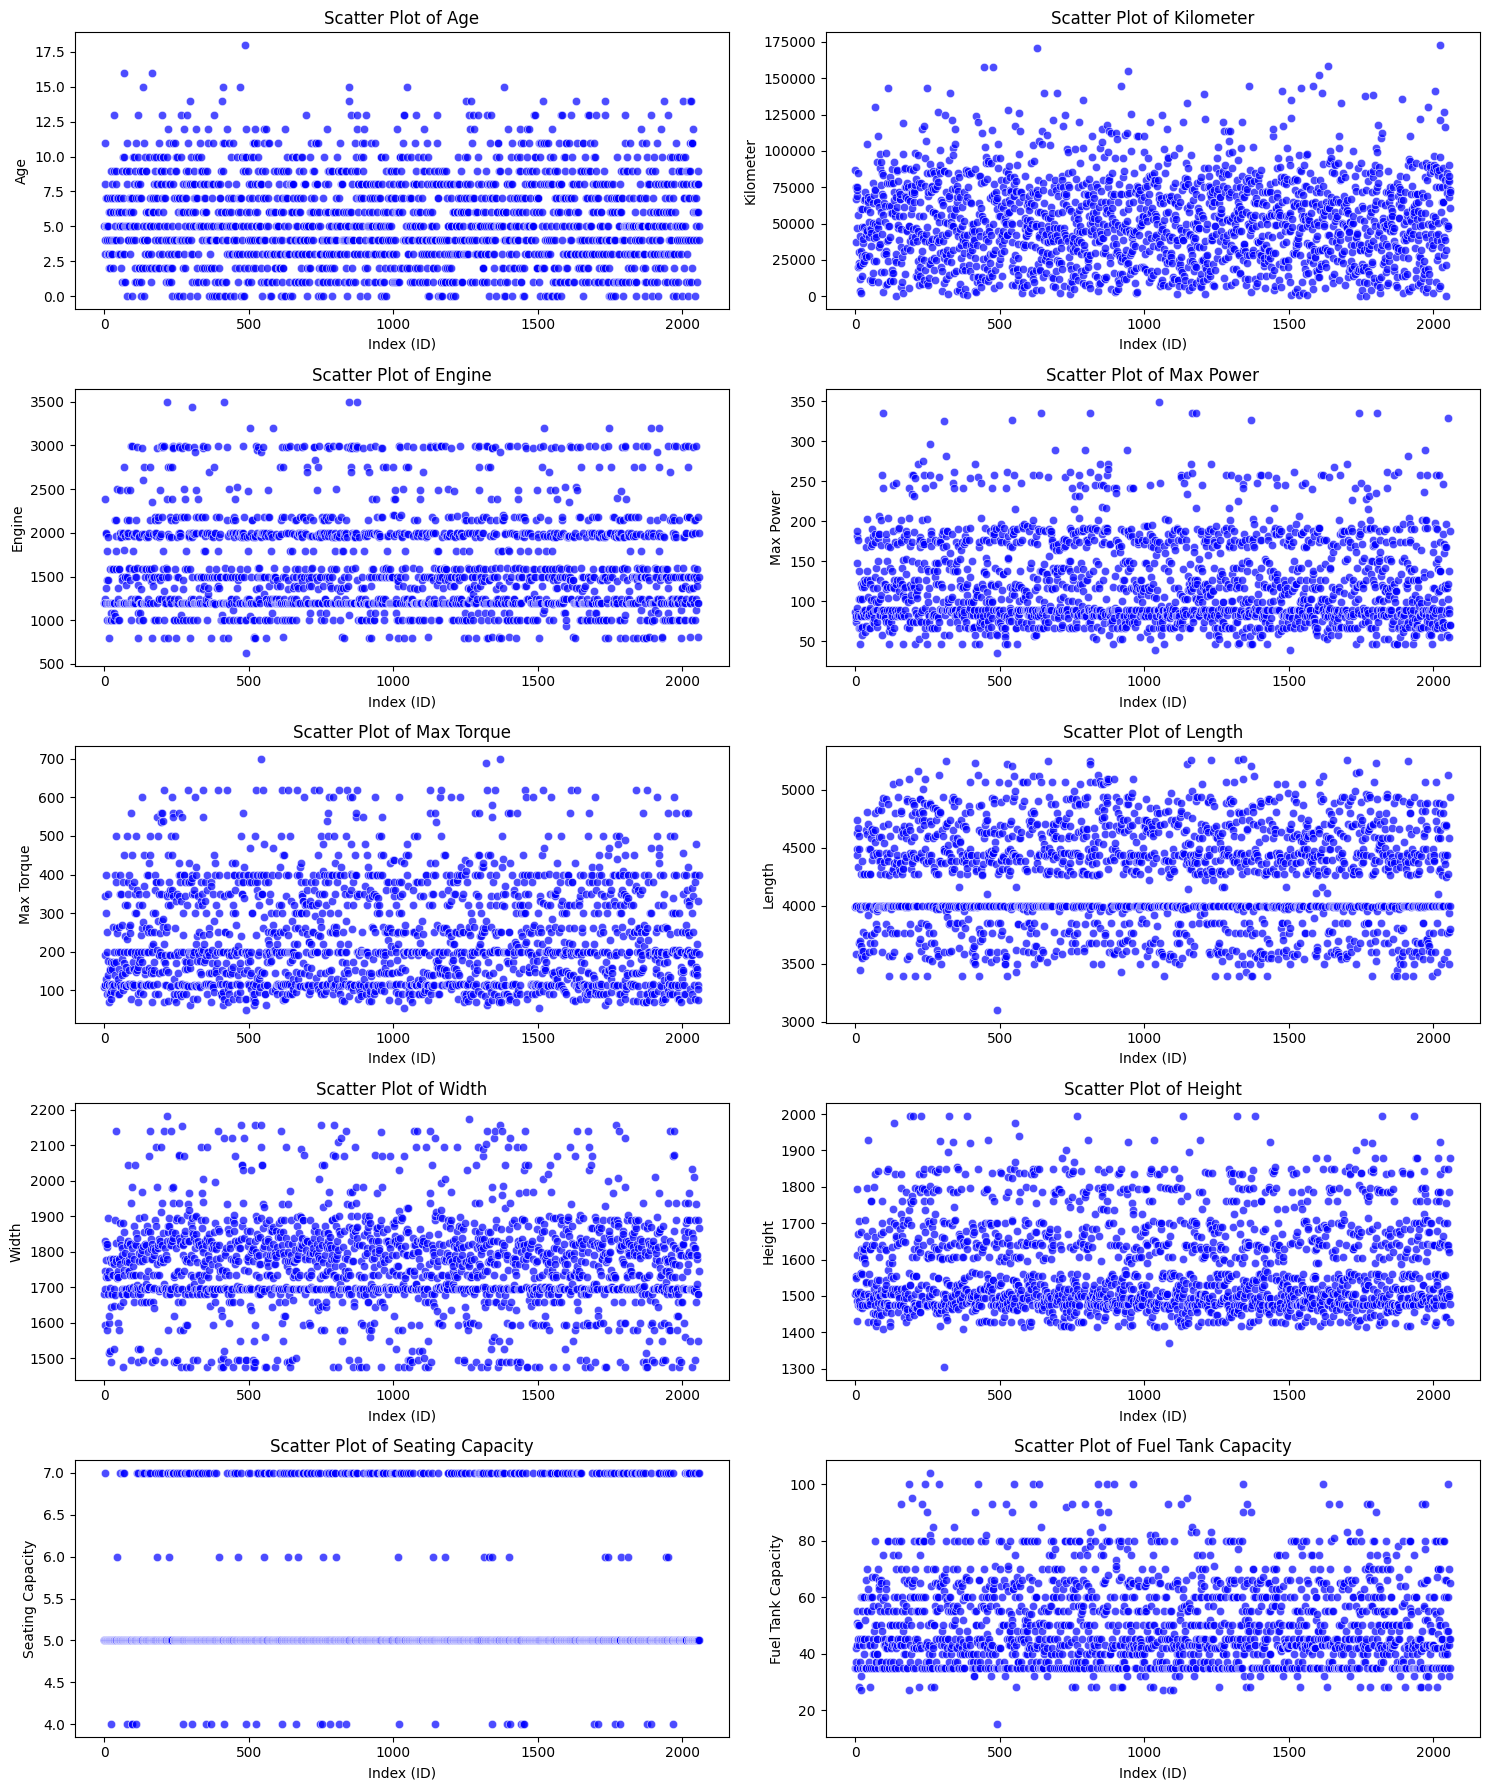

In [23]:
# Create scatter plots for each feature
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Calculate the number of rows needed for the subplot grid
num_plots = len(selected_columns)
num_rows = (num_plots // 2) + (num_plots % 2)  # Round up if odd number of plots

# Iterate through each feature in the list and create a scatter plot for each
for i, feature in enumerate(selected_columns, 1):
    plt.subplot(num_rows, 2, i)  # Arrange the plots in a grid
    
    # Create scatter plot for each feature vs Index (ID)
    sns.scatterplot(x=df_merged.index, y=df_merged[feature], alpha=0.7, color="blue")
    
    # Set labels and title for each plot
    plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
    plt.ylabel(feature)
    plt.title(f"Scatter Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [24]:
# Calculate the min, max, and mean for numerical columns
min_values = df2.select_dtypes(include=['int', 'float']).min()
max_values = df2.select_dtypes(include=['int', 'float']).max()
mean_values = df2.select_dtypes(include=['int', 'float']).mean()

# Print min values, max values, and mean values with 4 decimal places
print("Min Values:")
for column in min_values.index:
    print(f"{column}: {round(min_values[column], 4)}")

print("\nMax Values:")
for column in max_values.index:
    print(f"{column}: {round(max_values[column], 4)}")

print("\nMean Values:")
for column in mean_values.index:
    print(f"{column}: {round(mean_values[column], 4)}")

Min Values:
Make: 0.0
Model: 0.0
Price: 49000.0
Age: 0.0
Kilometer: 0.0
Fuel Type: 0.0
Transmission: 0.0
Location: 0.0
Color: 0.0
Owner: 0.0
Seller Type: 0.0
Engine: 624.0
Max Power: 35.0
Max Torque: 48.0
Drivetrain: 0.0
Length: 3099.0
Width: 1475.0
Height: 1165.0
Seating Capacity: 2.0
Fuel Tank Capacity: 15.0
id: 0.0

Max Values:
Make: 32.0
Model: 195.0
Price: 35000000.0
Age: 34.0
Kilometer: 2000000.0
Fuel Type: 8.0
Transmission: 1.0
Location: 76.0
Color: 16.0
Owner: 5.0
Seller Type: 2.0
Engine: 6592.0
Max Power: 660.0
Max Torque: 780.0
Drivetrain: 2.0
Length: 5569.0
Width: 2220.0
Height: 1995.0
Seating Capacity: 8.0
Fuel Tank Capacity: 105.0
id: 2058.0

Mean Values:
Make: 15.0393
Model: 93.677
Price: 1702991.6965
Age: 5.5746
Kilometer: 54224.7144
Fuel Type: 3.7999
Transmission: 0.5503
Location: 32.2147
Color: 10.4633
Owner: 1.4653
Seller Type: 1.9675
Engine: 1673.3205
Max Power: 128.0335
Max Torque: 244.0602
Drivetrain: 1.0238
Length: 4271.9752
Width: 1765.7232
Height: 1588.1068
Seat

In [25]:
# Calculate the min, max, and mean for numerical columns
min_values = df_merged.select_dtypes(include=['int', 'float']).min()
max_values = df_merged.select_dtypes(include=['int', 'float']).max()
mean_values = df_merged.select_dtypes(include=['int', 'float']).mean()

# Print min values, max values, and mean values with 4 decimal places
print("Min Values:")
for column in min_values.index:
    print(f"{column}: {round(min_values[column], 4)}")

print("\nMax Values:")
for column in max_values.index:
    print(f"{column}: {round(max_values[column], 4)}")

print("\nMean Values:")
for column in mean_values.index:
    print(f"{column}: {round(mean_values[column], 4)}")


Min Values:
Make: 0.0
Model: 0.0
Price: 49000.0
Age: 0.0
Kilometer: 0.0
Fuel Type: 0.0
Transmission: 0.0
Location: 0.0
Color: 0.0
Owner: 0.0
Seller Type: 0.0
Engine: 624.0
Max Power: 35.0
Max Torque: 48.0
Drivetrain: 0.0
Length: 3099.0
Width: 1475.0
Height: 1304.0
Seating Capacity: 4.0
Fuel Tank Capacity: 15.0
id: 0.0

Max Values:
Make: 32.0
Model: 195.0
Price: 18500000.0
Age: 18.0
Kilometer: 173000.0
Fuel Type: 7.0
Transmission: 1.0
Location: 76.0
Color: 16.0
Owner: 5.0
Seller Type: 2.0
Engine: 3498.0
Max Power: 349.0
Max Torque: 700.0
Drivetrain: 2.0
Length: 5265.0
Width: 2183.0
Height: 1995.0
Seating Capacity: 7.0
Fuel Tank Capacity: 104.0
id: 2058.0

Mean Values:
Make: 14.8774
Model: 93.2871
Price: 1571634.665
Age: 5.499
Kilometer: 51845.4733
Fuel Type: 3.8083
Transmission: 0.5505
Location: 32.0691
Color: 10.4273
Owner: 1.4506
Seller Type: 1.9677
Engine: 1631.5328
Max Power: 124.4349
Max Torque: 238.9834
Drivetrain: 1.0086
Length: 4257.6347
Width: 1761.8259
Height: 1583.7074
Seatin

In [26]:
# Compute absolute correlation of all numerical columns with 'Price'
df_merged.corr()['Price']

Make                 -0.066727
Model                -0.099174
Price                 1.000000
Age                  -0.405322
Kilometer            -0.277879
Fuel Type            -0.228163
Transmission         -0.550297
Location             -0.107209
Color                -0.122026
Owner                 0.017985
Seller Type          -0.068332
Engine                0.600228
Max Power             0.775204
Max Torque            0.705831
Drivetrain           -0.143018
Length                0.622238
Width                 0.627122
Height                0.172934
Seating Capacity      0.116065
Fuel Tank Capacity    0.590731
id                    0.006112
Name: Price, dtype: float64

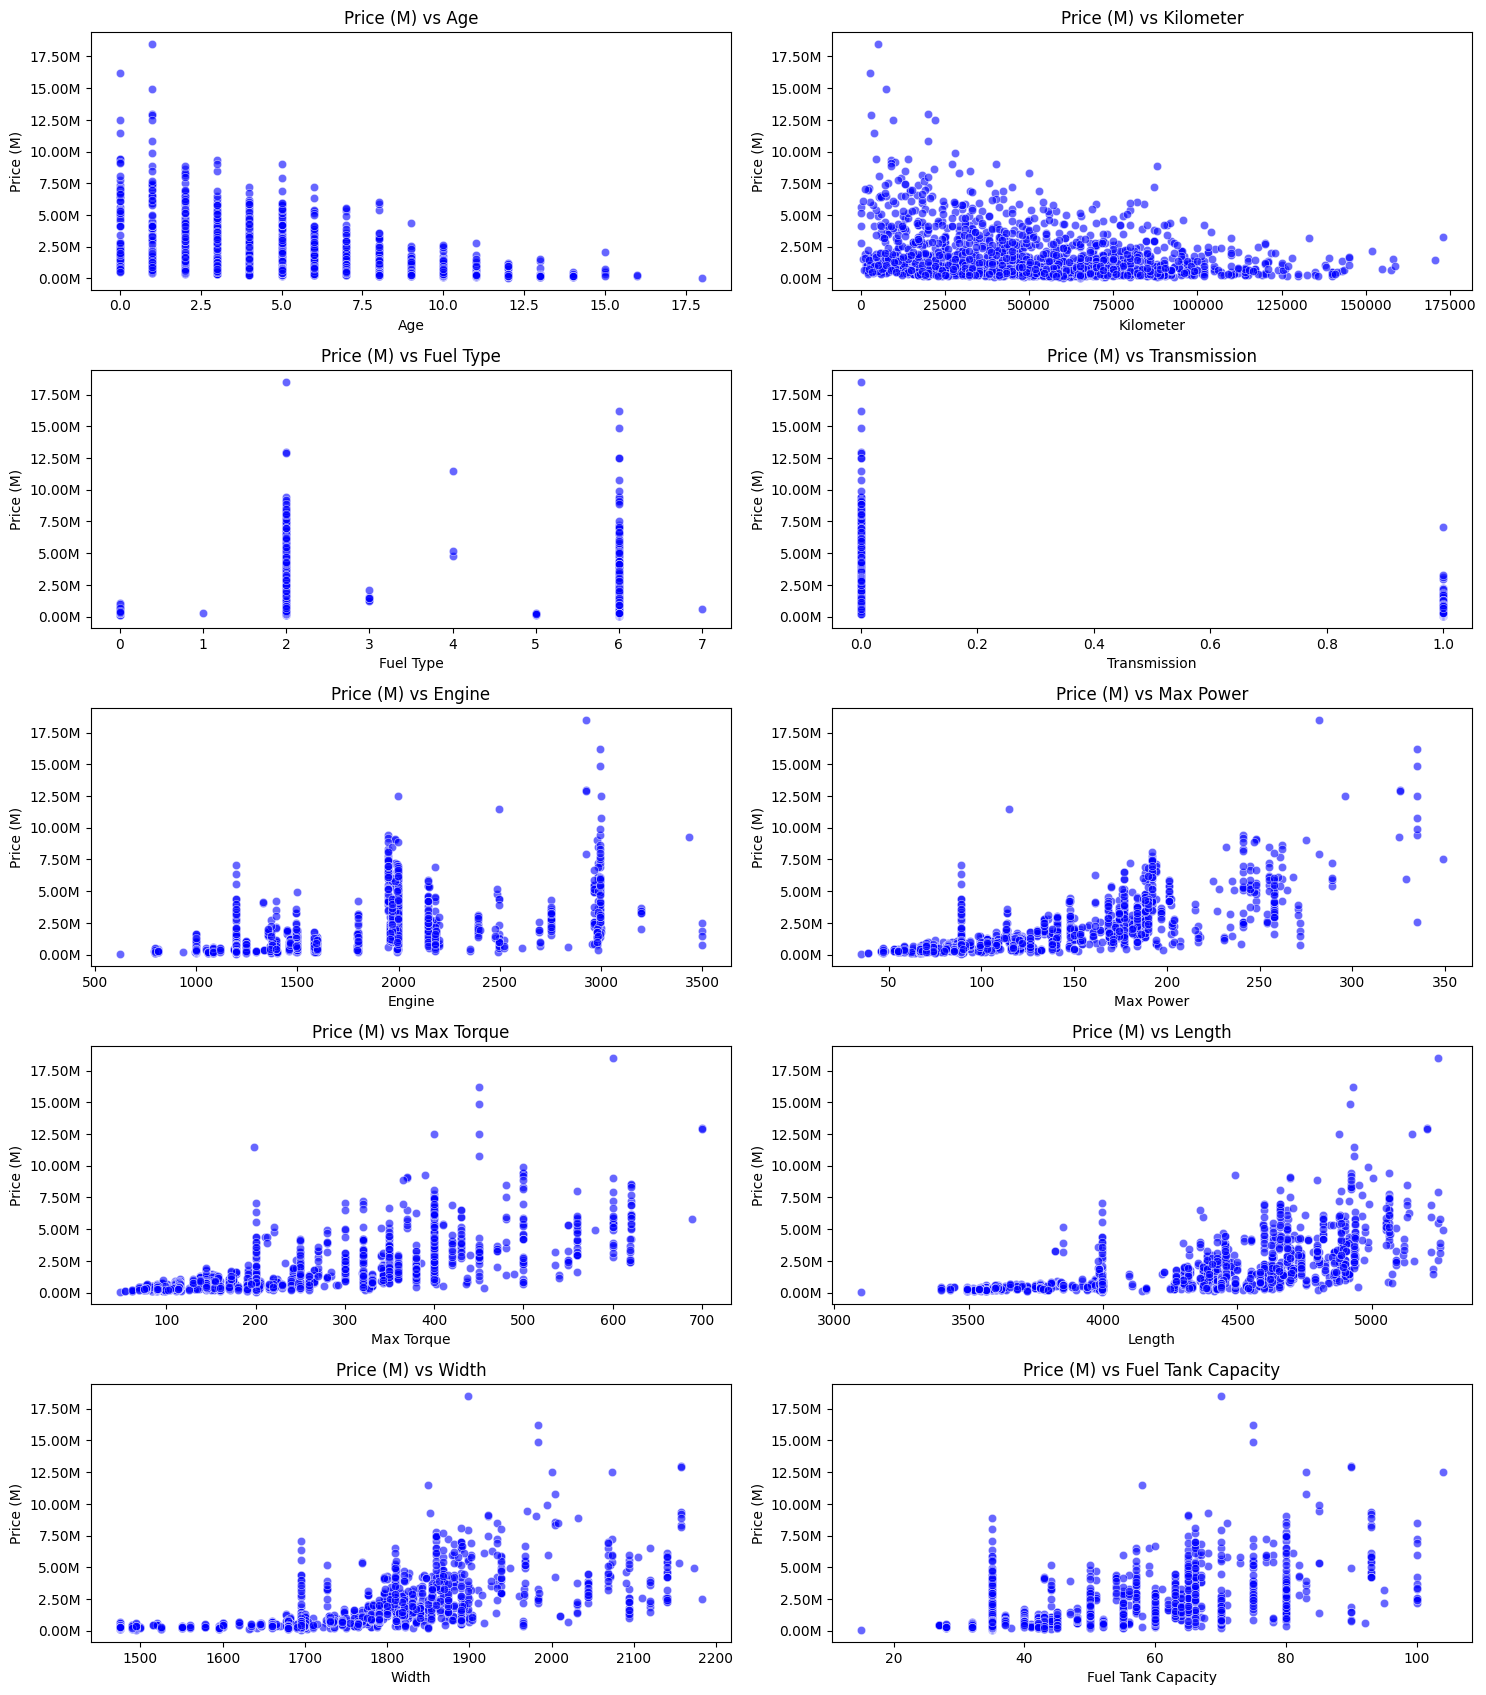

In [27]:
# Define selected columns
selected_columns = [
    "Age", "Kilometer", "Fuel Type", "Transmission", 
    "Engine", "Max Power", "Max Torque", "Length", "Width", "Fuel Tank Capacity", "Price"
]

# Create a new DataFrame with selected columns
df_corr_selected = df_merged[selected_columns]

# Set figure size
plt.figure(figsize=(15, 20))

# Generate scatter plots for each feature against Price
for i, feature in enumerate(df_corr_selected.columns, 1):
    if feature != "Price":  # No need to plot Price vs Price
        plt.subplot(6, 2, i)
        sns.scatterplot(x=df_corr_selected[feature], y=df_corr_selected["Price"], alpha=0.6, color="blue")
        
        # Format the y-axis (Price) in millions
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))
        
        # Labels and title
        plt.xlabel(feature)
        plt.ylabel("Price (M)")
        plt.title(f"Price (M) vs {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [28]:
df_corr_selected.loc[df_corr_selected["Max Power"] == 89, "Max Power"] = 155
df_merged.loc[df_merged["Max Power"] == 89, "Max Power"] = 155
df_corr_selected = df_corr_selected[df_corr_selected["Price"] != df_corr_selected["Price"].max()]
df_merged = df_merged[df_merged["Price"] != df_merged["Price"].max()]

In [29]:
df_corr_selected.loc[df_corr_selected["Fuel Tank Capacity"] == 35, "Fuel Tank Capacity"] = 62
df_merged.loc[df_merged["Fuel Tank Capacity"] == 35, "Fuel Tank Capacity"] = 62

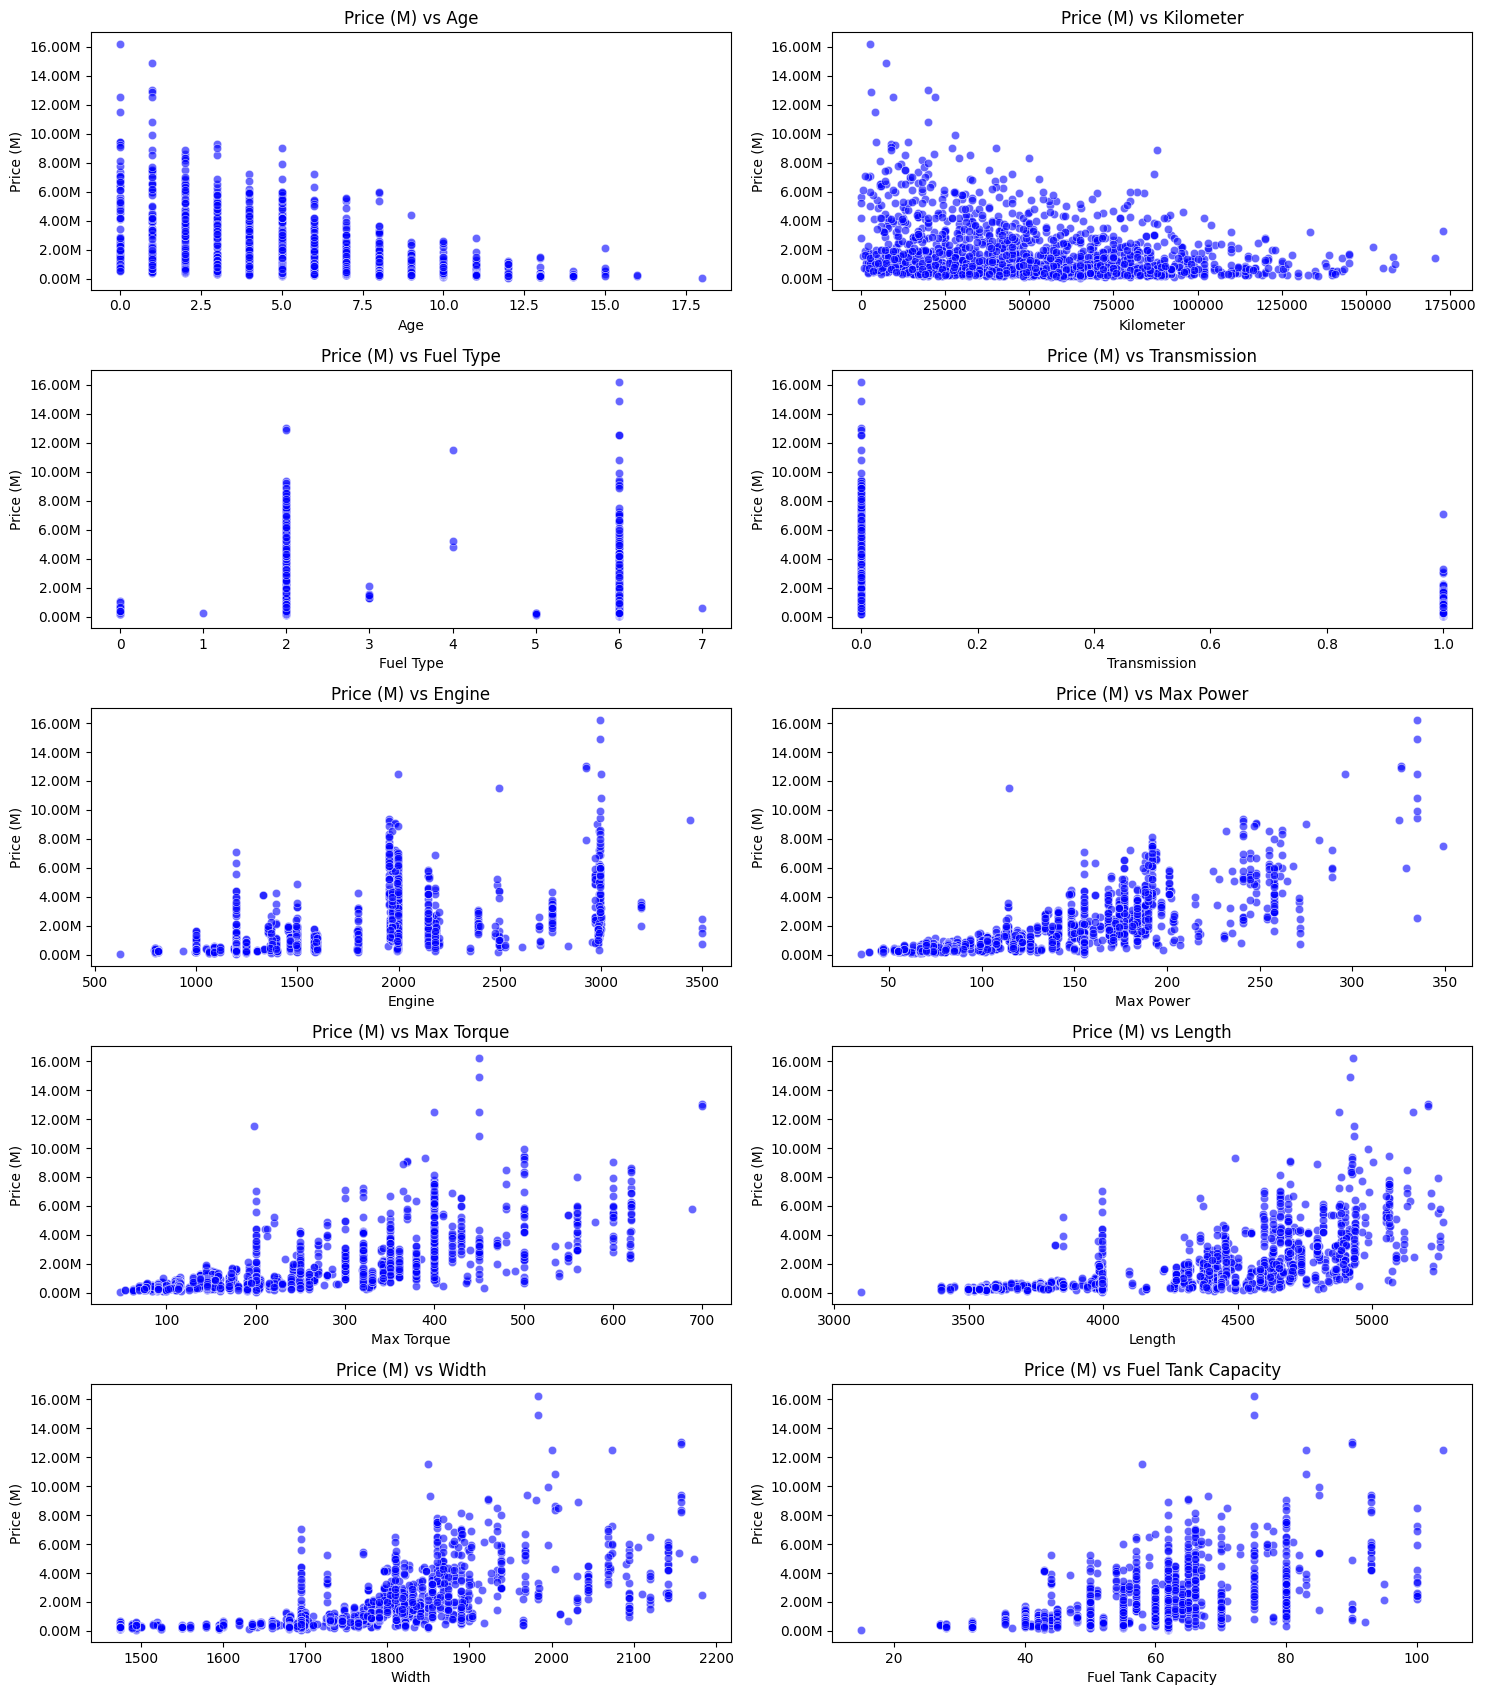

In [30]:
# Set figure size
plt.figure(figsize=(15, 20))

# Generate scatter plots for each feature against Price
for i, feature in enumerate(df_corr_selected.columns, 1):
    if feature != "Price":  # No need to plot Price vs Price
        plt.subplot(6, 2, i)
        sns.scatterplot(x=df_corr_selected[feature], y=df_corr_selected["Price"], alpha=0.6, color="blue")
        
        # Format the y-axis (Price) in millions
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))
        
        # Labels and title
        plt.xlabel(feature)
        plt.ylabel("Price (M)")
        plt.title(f"Price (M) vs {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

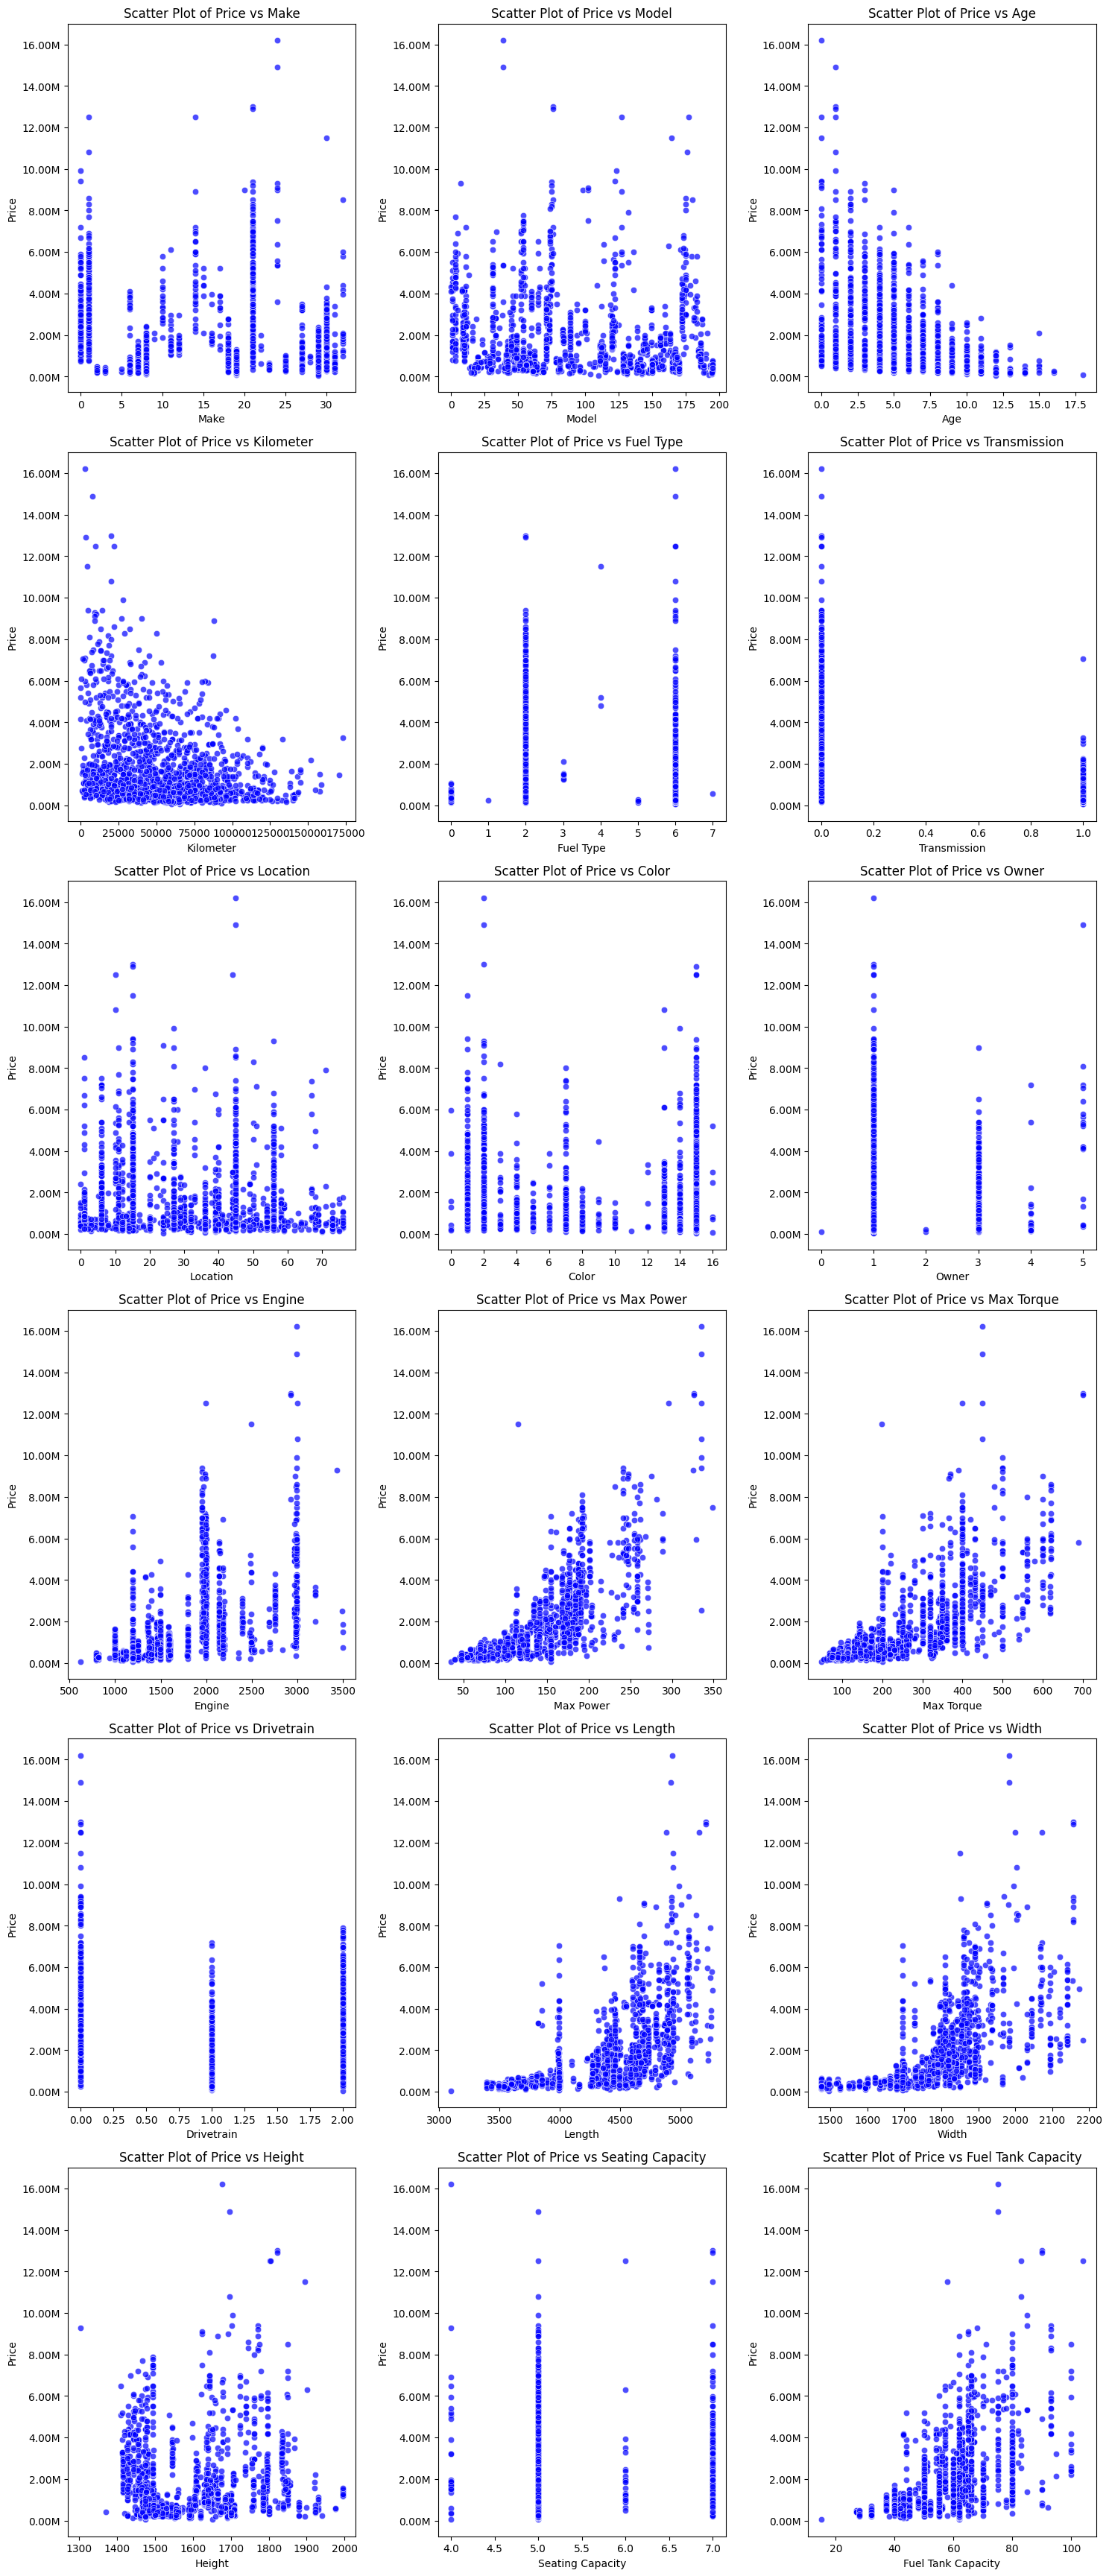

In [31]:
# Set figure size for the plots
plt.figure(figsize=(15, 2 * (len(df_merged.columns) - 1)))  # Exclude 'id' column

# Determine the number of rows and columns for the grid layout
num_cols = 3  # Two-column grid layout
num_rows = (len(df_merged.columns) - 1 + 1) // num_cols  # Exclude 'id' column

# Create scatter plots for each column (excluding 'Price' and 'id')
plot_index = 1
for column in df_merged.columns:
    if column in ["Price", "id","Seller Type"]:  # Exclude 'Price' and 'id' columns
        continue
    
    plt.subplot(num_rows, num_cols, plot_index)
    sns.scatterplot(x=df_merged[column], y=df_merged["Price"], alpha=0.7, color="blue")
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.title(f"Scatter Plot of Price vs {column}")
    plot_index += 1

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import KBinsDiscretizer

# List of columns to discretize
discretized_columns = ["Age", "Kilometer", "Max Power", "Max Torque", "Length", "Width", "Fuel Tank Capacity"]

# Number of bins to use for discretization
n_bins = 8  # 8 categories for each column

# Copy df_merged to df_discretize
df_discretize = df_merged.copy()

# Apply discretization using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
df_discretize[discretized_columns] = discretizer.fit_transform(df_discretize[discretized_columns])

# Rename columns by adding '_d' to each column name
df_discretize.columns = [f"{col}_d" if col in discretized_columns else col for col in df_discretize.columns]

# Merge df_discretize with df_merged on the index, ensuring the discretized columns exist in df_discretize
df_merged_with_discretized = pd.merge(df_merged, df_discretize[[f"{col}_d" for col in discretized_columns]], 
                                      left_index=True, right_index=True, how='inner')

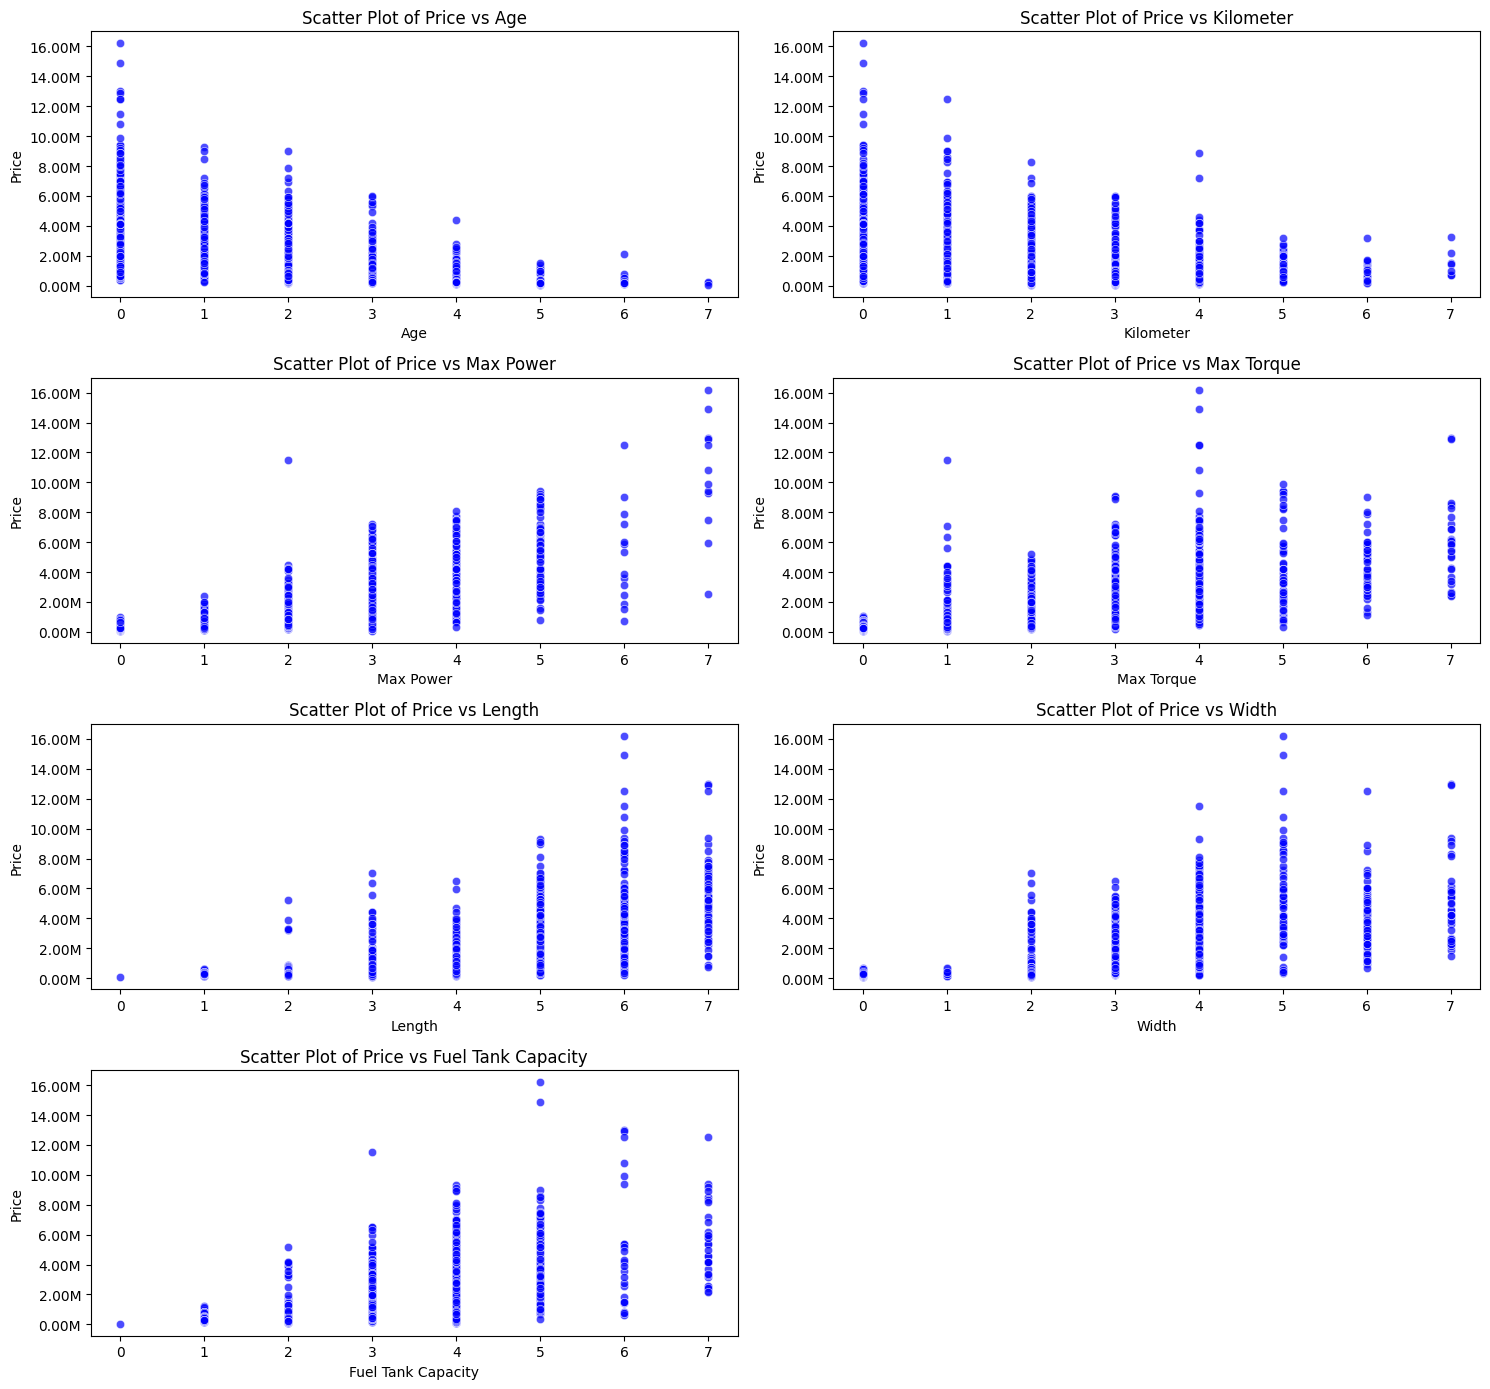

In [33]:
# Set figure size
plt.figure(figsize=(15, 2 * len(discretized_columns)))

# Define grid layout
num_cols = 2  # Two columns
num_rows = (len(discretized_columns) + 1) // num_cols  # Calculate number of rows

# Create scatter plots for each discretized feature vs. Price
plot_index = 1
for column in discretized_columns:
    # Add '_d' suffix to each column name for the discretized column
    discretized_column = f"{column}_d"
    
    plt.subplot(num_rows, num_cols, plot_index)
    sns.scatterplot(x=df_discretize[discretized_column], y=df_discretize["Price"], alpha=0.7, color="blue")
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))  # Format y-axis as millions
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.title(f"Scatter Plot of Price vs {column}")
    plot_index += 1

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [34]:
# Print the correlation between Price and other variables
print(df_merged_with_discretized.corr()["Price"])

Make                   -0.071338
Model                  -0.104479
Price                   1.000000
Age                    -0.407783
Kilometer              -0.276683
Fuel Type              -0.229041
Transmission           -0.557244
Location               -0.115451
Color                  -0.128720
Owner                  -0.000023
Seller Type            -0.070622
Engine                  0.603284
Max Power               0.745351
Max Torque              0.709824
Drivetrain             -0.155314
Length                  0.625890
Width                   0.636083
Height                  0.180041
Seating Capacity        0.120367
Fuel Tank Capacity      0.532991
id                     -0.000751
Age_d                  -0.400131
Kilometer_d            -0.270833
Max Power_d             0.703055
Max Torque_d            0.697936
Length_d                0.616728
Width_d                 0.634037
Fuel Tank Capacity_d    0.496862
Name: Price, dtype: float64


In [35]:
# Create a new DataFrame
df_merged_with_discretized_fs = df_merged_with_discretized.copy()

# List of selected columns for feature scaling
selected_columns = [
    "Age", "Kilometer", "Engine", "Max Power", "Max Torque", "Length", "Width", "Height",
    "Seating Capacity", "Fuel Tank Capacity",
    "Age_d", "Kilometer_d", "Max Power_d", "Max Torque_d", "Length_d",
    "Width_d", "Fuel Tank Capacity_d"
]

# Calculate correlations with Price
correlation_with_price = df_merged_with_discretized[selected_columns + ["Price"]].corr()["Price"]

# Function to determine importance level
def determine_importance(corr_value):
    if abs(corr_value) <= 0.15:
        return 1
    elif abs(corr_value) <= 0.3:
        return 2
    elif abs(corr_value) <= 0.45:
        return 3
    elif abs(corr_value) <= 0.6:
        return 4
    elif abs(corr_value) <= 0.7:
        return 5
    else:
        return 6

# Compute importance levels
importance_mapping = correlation_with_price.apply(determine_importance)

# Add new columns to df_merged_with_discretized_fs
for column in selected_columns:
    if column in importance_mapping.index:
        importance = importance_mapping[column]
        df_merged_with_discretized_fs[f"{column}_fs"] = df_merged_with_discretized[column] * importance

# Display the first few rows of the new DataFrame
df_merged_with_discretized_fs.head()

Make  Model    Price  Age  Kilometer  Fuel Type  Transmission  Location  \
0     7     20   505000    5      87150          6             1        56   
1    19    150   450000    8      75000          2             1        40   
2     8    194   220000   11      67000          6             1        39   
3    30     78   799000    3      37500          6             1        41   
4    30     89  1950000    4      69000          2             1        45   

   Color  Owner  ...  Height_fs  Seating Capacity_fs  Fuel Tank Capacity_fs  \
0      7      1  ...     3010.0                  5.0                  248.0   
1     15      3  ...     3110.0                  5.0                  168.0   
2      8      1  ...     3100.0                  5.0                  248.0   
3     13      1  ...     3020.0                  5.0                  148.0   
4      7      1  ...     3590.0                  7.0                  220.0   

   Age_d_fs  Kilometer_d_fs  Max Power_d_fs  Max Torque_d_fs  Length_d_fs  \
0       6.0             8.0             6.0              0.0         15.0   
1       9.0             6.0             0.0              5.0         15.0   
2      12.0             6.0             6.0              0.0          5.0   
3       3.0             2.0             6.0              0.0         15.0   
4       3.0             6.0            12.0             15.0         30.0   

   Width_d_fs  Fuel Tank Capacity_d_fs  
0        10.0                     16.0  
1        10.0                      8.0  
2         5.0                     16.0  
3        15.0                      4.0  
4        20.0                     12.0  

[5 rows x 45 columns]

In [36]:
df_merged_with_discretized_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1981 entries, 0 to 2058
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     1981 non-null   int32  
 1   Model                    1981 non-null   int32  
 2   Price                    1981 non-null   int64  
 3   Age                      1981 non-null   int64  
 4   Kilometer                1981 non-null   int64  
 5   Fuel Type                1981 non-null   int32  
 6   Transmission             1981 non-null   int32  
 7   Location                 1981 non-null   int32  
 8   Color                    1981 non-null   int32  
 9   Owner                    1981 non-null   int32  
 10  Seller Type              1981 non-null   int32  
 11  Engine                   1981 non-null   float64
 12  Max Power                1981 non-null   float64
 13  Max Torque               1981 non-null   float64
 14  Drivetrain               1981

In [37]:
# Assuming df2 is already loaded, and df_g is defined with selected columns.
columns_to_select = ["Age", "Kilometer", "Engine", "Max Power", "Max Torque", "Length", "Width", "Height", "Fuel Tank Capacity"]
df_g = df_merged[columns_to_select].copy()

# Calculate quartiles and assign values
for col in df_g.columns:
    # Calculate quartile values
    q1 = df_g[col].quantile(0.25)
    q2 = df_g[col].quantile(0.50)
    q3 = df_g[col].quantile(0.75)
    
    # Bin the data into 1, 2, 3, and 4 categories and create a new column
    df_g[col] = pd.cut(df_g[col], bins=[-float('inf'), q1, q2, q3, float('inf')], labels=[1, 2, 3, 4])
df_g.columns = [col + '_g' for col in df_g.columns]
# Convert all category columns to integer
for col in df_g.select_dtypes(include='category').columns:
    df_g[col] = df_g[col].cat.codes  # Convert categories to integer codes
df_merged_with_discretized_fs_g = pd.concat([df_merged_with_discretized_fs, df_g], axis=1)
df_g.head()

Age_g  Kilometer_g  Engine_g  Max Power_g  Max Torque_g  Length_g  Width_g  \
0      1            3         1            1             0         1        0   
1      2            3         1            0             1         1        0   
2      3            2         0            0             0         0        0   
3      0            1         0            0             0         1        1   
4      1            2         3            2             2         3        2   

   Height_g  Fuel Tank Capacity_g  
0         1                     2  
1         2                     0  
2         2                     2  
3         1                     0  
4         3                     1

In [38]:
# Create a new DataFrame to avoid modifying the original
df_shifted = df_merged_with_discretized_fs_g.copy()

# List of selected columns with extensions
selected_columns_with_extensions = [
    'Age', 'Kilometer', 
    'Engine', 'Max Power', 'Max Torque', 
    'Length', 'Width', 'Height', 
    'Seating Capacity', 'Fuel Tank Capacity',
    
    # Extensions for each column
    'Price_d', 'Age_d', 'Kilometer_d', 
    'Engine_d', 'Max Power_d', 'Max Torque_d', 
    'Length_d', 'Width_d', 'Fuel Tank Capacity_d',
    
    'Age_fs', 'Kilometer_fs', 'Engine_fs', 
    'Max Power_fs', 'Max Torque_fs', 'Length_fs', 
    'Width_fs', 'Height_fs', 'Seating Capacity_fs', 
    'Fuel Tank Capacity_fs',
    
    'Age_d_fs', 'Kilometer_d_fs', 'Max Power_d_fs', 
    'Max Torque_d_fs', 'Length_d_fs', 'Width_d_fs', 
    'Fuel Tank Capacity_d_fs',
    
    'Age_g', 'Kilometer_g', 'Engine_g', 
    'Max Power_g', 'Max Torque_g', 'Length_g', 
    'Width_g', 'Height_g', 'Fuel Tank Capacity_g'
]

# Shift only the numerical columns in the selected_columns_with_extensions list
for column in selected_columns_with_extensions:
    if column in df_shifted.columns:  # Check if the column exists in the DataFrame
        if pd.api.types.is_numeric_dtype(df_shifted[column]):  # Check if it's a numeric column
            min_value = df_shifted[column].min()  # Get the minimum value of the column
            df_shifted[column] = df_shifted[column] - min_value + 1  # Shift the values to make the min value 1

# Check the minimum values of the shifted columns
df_shifted.min()

Make                           0.0
Model                          0.0
Price                      49000.0
Age                            1.0
Kilometer                      1.0
Fuel Type                      0.0
Transmission                   0.0
Location                       0.0
Color                          0.0
Owner                          0.0
Seller Type                    0.0
Engine                         1.0
Max Power                      1.0
Max Torque                     1.0
Drivetrain                     0.0
Length                         1.0
Width                          1.0
Height                         1.0
Seating Capacity               1.0
Fuel Tank Capacity             1.0
id                             0.0
Age_d                          1.0
Kilometer_d                    1.0
Max Power_d                    1.0
Max Torque_d                   1.0
Length_d                       1.0
Width_d                        1.0
Fuel Tank Capacity_d           1.0
Age_fs              

In [39]:
# Create a new DataFrame to avoid modifying the original
df_normalized = df_shifted.copy()

# Normalize the selected numerical columns to the range [0, 1]
for column in selected_columns_with_extensions:
    if column in df_normalized.columns:  # Check if the column exists in the DataFrame
        if pd.api.types.is_numeric_dtype(df_normalized[column]):  # Check if it's a numeric column
            min_value = df_normalized[column].min()  # Get the minimum value of the column
            max_value = df_normalized[column].max()  # Get the maximum value of the column
            if max_value - min_value != 0:
                # Normalize the values to the range [0, 1]
                df_normalized[column] = (df_normalized[column] - min_value) / (max_value - min_value)
            else:
                # If the column has no variation (max = min), set it to a constant (e.g., 0.5)
                df_normalized[column] = 0.5

# Display the first few rows of the updated DataFrame
df_normalized.head()


Make  Model    Price       Age  Kilometer  Fuel Type  Transmission  \
0     7     20   505000  0.277778   0.503757          6             1   
1    19    150   450000  0.444444   0.433526          2             1   
2     8    194   220000  0.611111   0.387283          6             1   
3    30     78   799000  0.166667   0.216763          6             1   
4    30     89  1950000  0.222222   0.398844          2             1   

   Location  Color  Owner  ...  Fuel Tank Capacity_d_fs     Age_g  \
0        56      7      1  ...                 0.571429  0.333333   
1        40     15      3  ...                 0.285714  0.666667   
2        39      8      1  ...                 0.571429  1.000000   
3        41     13      1  ...                 0.142857  0.000000   
4        45      7      1  ...                 0.428571  0.333333   

   Kilometer_g  Engine_g  Max Power_g  Max Torque_g  Length_g   Width_g  \
0     1.000000  0.333333     0.333333      0.000000  0.333333  0.000000   
1     1.000000  0.333333     0.000000      0.333333  0.333333  0.000000   
2     0.666667  0.000000     0.000000      0.000000  0.000000  0.000000   
3     0.333333  0.000000     0.000000      0.000000  0.333333  0.333333   
4     0.666667  1.000000     0.666667      0.666667  1.000000  0.666667   

   Height_g  Fuel Tank Capacity_g  
0  0.333333              0.666667  
1  0.666667              0.000000  
2  0.666667              0.666667  
3  0.333333              0.000000  
4  1.000000              0.333333  

[5 rows x 54 columns]

In [40]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1981 entries, 0 to 2058
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     1981 non-null   int32  
 1   Model                    1981 non-null   int32  
 2   Price                    1981 non-null   int64  
 3   Age                      1981 non-null   float64
 4   Kilometer                1981 non-null   float64
 5   Fuel Type                1981 non-null   int32  
 6   Transmission             1981 non-null   int32  
 7   Location                 1981 non-null   int32  
 8   Color                    1981 non-null   int32  
 9   Owner                    1981 non-null   int32  
 10  Seller Type              1981 non-null   int32  
 11  Engine                   1981 non-null   float64
 12  Max Power                1981 non-null   float64
 13  Max Torque               1981 non-null   float64
 14  Drivetrain               1981

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   int32  
 1   Model               2059 non-null   int32  
 2   Price               2059 non-null   int64  
 3   Age                 2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int32  
 6   Transmission        2059 non-null   int32  
 7   Location            2059 non-null   int32  
 8   Color               2059 non-null   int32  
 9   Owner               2059 non-null   int32  
 10  Seller Type         2059 non-null   int32  
 11  Engine              2059 non-null   float64
 12  Max Power           2059 non-null   float64
 13  Max Torque          2059 non-null   float64
 14  Drivetrain          2059 non-null   int32  
 15  Length              2059 non-null   float64
 16  Width 

In [42]:
from rich.console import Console
from rich.table import Table

console = Console()

def print_head_with_red_price(df, title):
    # İlk 8 sütun + price sütunu al (price varsa)
    cols = list(df.columns[:11])
    if 'price' in df.columns and 'Price' not in cols:
        cols.append('Price')

    table = Table(title=title)
    
    for col in cols:
        if col == 'Price':
            table.add_column(f"[bold red]{col}[/bold red]", justify="right")
        else:
            table.add_column(col, justify="right")
    
    for _, row in df[cols].head().iterrows():
        row_data = [f"[bold red]{v}[/bold red]" if col == 'Price' else str(v)
                    for col, v in row.items()]
        table.add_row(*row_data)
    console.print(table)

# Gösterimler
print_head_with_red_price(df2, "🔷 df2")
print_head_with_red_price(df_merged, "🟨 df_merged")
print_head_with_red_price(df_normalized, "🟩 df_normalized")


                                                     🔷 df2                                                     
┏━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┓
┃ Make ┃ Model ┃   Price ┃ Age ┃ Kilometer ┃ Fuel Type ┃ Transmission ┃ Location ┃ Color ┃ Owner ┃ Seller Type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━┩
│    7 │    20 │  505000 │   5 │     87150 │         6 │            1 │       56 │     7 │     1 │           1 │
│   19 │   150 │  450000 │   8 │     75000 │         2 │            1 │       40 │    15 │     3 │           2 │
│    8 │   194 │  220000 │  11 │     67000 │         6 │            1 │       39 │     8 │     1 │           2 │
│   30 │    78 │  799000 │   3 │     37500 │         6 │            1 │       41 │    13 │     1 │           2 │
│   30 │    89 │ 1950000 │   4 │     69000 │         2 │            1 │       45 │     7 │     1 │           2 │
└──────┴───────┴─────────┴─────┴───────────┴───────────┴──────────────┴──────────┴───────┴───────┴─────────────┘

                                                  🟨 df_merged                                                  
┏━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┓
┃ Make ┃ Model ┃   Price ┃ Age ┃ Kilometer ┃ Fuel Type ┃ Transmission ┃ Location ┃ Color ┃ Owner ┃ Seller Type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━┩
│    7 │    20 │  505000 │   5 │     87150 │         6 │            1 │       56 │     7 │     1 │           1 │
│   19 │   150 │  450000 │   8 │     75000 │         2 │            1 │       40 │    15 │     3 │           2 │
│    8 │   194 │  220000 │  11 │     67000 │         6 │            1 │       39 │     8 │     1 │           2 │
│   30 │    78 │  799000 │   3 │     37500 │         6 │            1 │       41 │    13 │     1 │           2 │
│   30 │    89 │ 1950000 │   4 │     69000 │         2 │            1 │       45 │     7 │     1 │           2 │
└──────┴───────┴─────────┴─────┴───────────┴───────────┴──────────────┴──────────┴───────┴───────┴─────────────┘

                                                 🟩 df_normalized                                                  
┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃      ┃       ┃           ┃           ┃           ┃           ┃           ┃          ┃       ┃       ┃    Seller ┃
┃ Make ┃ Model ┃     Price ┃       Age ┃ Kilometer ┃ Fuel Type ┃ Transmis… ┃ Location ┃ Color ┃ Owner ┃      Type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│  7.0 │  20.0 │  505000.0 │ 0.277777… │ 0.503757… │       6.0 │       1.0 │     56.0 │   7.0 │   1.0 │       1.0 │
│ 19.0 │ 150.0 │  450000.0 │ 0.444444… │ 0.433526… │       2.0 │       1.0 │     40.0 │  15.0 │   3.0 │       2.0 │
│  8.0 │ 194.0 │  220000.0 │ 0.611111… │ 0.387283… │       6.0 │       1.0 │     39.0 │   8.0 │   1.0 │       2.0 │
│ 30.0 │  78.0 │  799000.0 │ 0.166666… │ 0.216763… │       6.0 │       1.0 │     41.0 │  13.0 │   1.0 │       2.0 │
│ 30.0 │  89.0 │ 1950000.0 │ 0.222222… │ 0.398843… │       2.0 │       1.0 │     45.0 │   7.0 │   1.0 │       2.0 │
└──────┴───────┴───────────┴───────────┴───────────┴───────────┴───────────┴──────────┴───────┴───────┴───────────┘

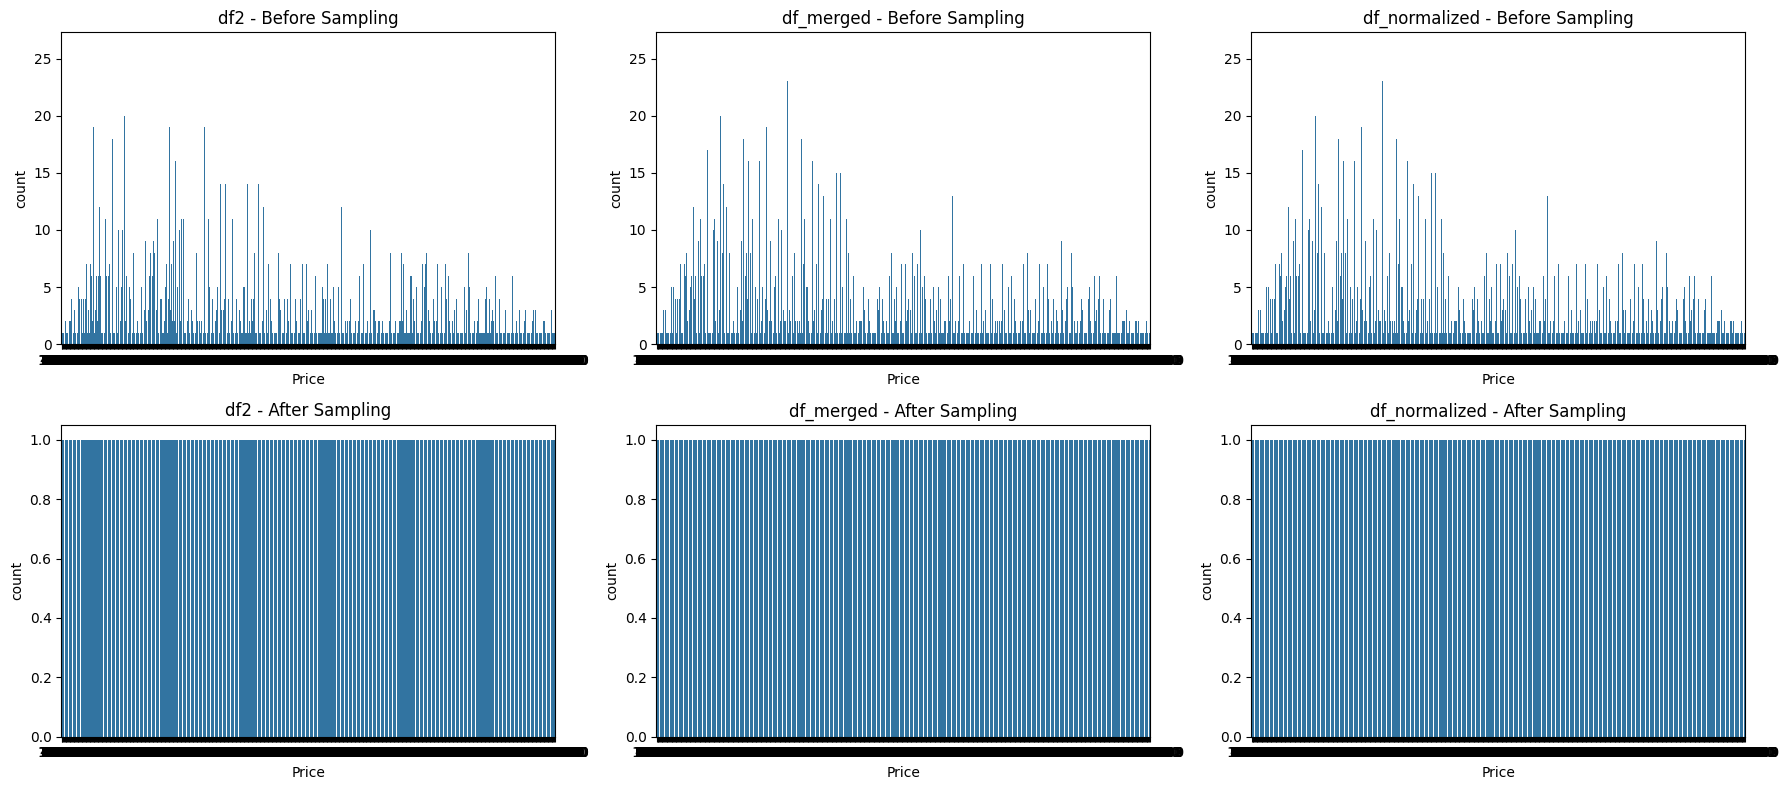

In [43]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

def apply_random_undersampling(df, target_col):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return pd.concat([X_res, y_res], axis=1)

df2_undersampled = apply_random_undersampling(df2, target_col='Price')
df_merged_undersampled = apply_random_undersampling(df_merged, target_col='Price')
df_normalized_undersampled = apply_random_undersampling(df_normalized, target_col='Price')

def plot_multiple_distributions(dfs_before, dfs_after, titles, target_col):
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    for i, (df_b, title) in enumerate(zip(dfs_before, titles)):
        sns.countplot(x=target_col, data=df_b, ax=axes[0, i])
        axes[0, i].set_title(f"{title} - Before Sampling")

    for i, (df_a, title) in enumerate(zip(dfs_after, titles)):
        sns.countplot(x=target_col, data=df_a, ax=axes[1, i])
        axes[1, i].set_title(f"{title} - After Sampling")

    plt.tight_layout()
    plt.show()

plot_multiple_distributions(
    [df2, df_merged, df_normalized],
    [df2_undersampled, df_merged_undersampled, df_normalized_undersampled],
    ['df2', 'df_merged', 'df_normalized'],
    target_col='Price'
)


In [44]:
print("df2")
print(df2.head())
print("df_merged")
print(df_merged.head())
print("df_normalized")
print(df_normalized.head())

df2
   Make  Model    Price  Age  Kilometer  Fuel Type  Transmission  Location  \
0     7     20   505000    5      87150          6             1        56   
1    19    150   450000    8      75000          2             1        40   
2     8    194   220000   11      67000          6             1        39   
3    30     78   799000    3      37500          6             1        41   
4    30     89  1950000    4      69000          2             1        45   

   Color  Owner  ...  Engine  Max Power  Max Torque  Drivetrain  Length  \
0      7      1  ...  1198.0       87.0       109.0           1  3990.0   
1     15      3  ...  1248.0       74.0       190.0           1  3995.0   
2      8      1  ...  1197.0       79.0       112.0           1  3585.0   
3     13      1  ...  1197.0       82.0       113.0           1  3995.0   
4      7      1  ...  2393.0      148.0       343.0           2  4735.0   

    Width  Height  Seating Capacity  Fuel Tank Capacity  id  
0  1680.0  150

In [45]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1981 entries, 0 to 2058
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     1981 non-null   int32  
 1   Model                    1981 non-null   int32  
 2   Price                    1981 non-null   int64  
 3   Age                      1981 non-null   float64
 4   Kilometer                1981 non-null   float64
 5   Fuel Type                1981 non-null   int32  
 6   Transmission             1981 non-null   int32  
 7   Location                 1981 non-null   int32  
 8   Color                    1981 non-null   int32  
 9   Owner                    1981 non-null   int32  
 10  Seller Type              1981 non-null   int32  
 11  Engine                   1981 non-null   float64
 12  Max Power                1981 non-null   float64
 13  Max Torque               1981 non-null   float64
 14  Drivetrain               1981

In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1981 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1981 non-null   int32  
 1   Model               1981 non-null   int32  
 2   Price               1981 non-null   int64  
 3   Age                 1981 non-null   int64  
 4   Kilometer           1981 non-null   int64  
 5   Fuel Type           1981 non-null   int32  
 6   Transmission        1981 non-null   int32  
 7   Location            1981 non-null   int32  
 8   Color               1981 non-null   int32  
 9   Owner               1981 non-null   int32  
 10  Seller Type         1981 non-null   int32  
 11  Engine              1981 non-null   float64
 12  Max Power           1981 non-null   float64
 13  Max Torque          1981 non-null   float64
 14  Drivetrain          1981 non-null   int32  
 15  Length              1981 non-null   float64
 16  Width      

In [47]:
from sklearn.model_selection import train_test_split

# 'Price' column as the target (y)
y = df_normalized['Price']

# Removing 'id' column from X
X = df_normalized.drop(columns=['id', 'Price'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
# X_train.csv dosyasına yaz
# pd.DataFrame(train).to_csv('train.csv', index=False)

# X_test.csv dosyasına yaz
# pd.DataFrame(test).to_csv('test.csv', index=False)

In [49]:
#train.info()

In [50]:
#test.info()

In [51]:
#import pandas as pd

# X_train.csv dosyasına yaz
#pd.DataFrame(X_train).to_csv('X_train.csv', index=False)

# X_test.csv dosyasına yaz
#pd.DataFrame(X_test).to_csv('X_test.csv', index=False)

# y_train.csv dosyasına yaz
#pd.DataFrame(y_train).to_csv('y_train.csv', index=False)

# y_test.csv dosyasına yaz
#pd.DataFrame(y_test).to_csv('y_test.csv', index=False)


In [52]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1485 entries, 1128 to 1173
Series name: Price
Non-Null Count  Dtype
--------------  -----
1485 non-null   int64
dtypes: int64(1)
memory usage: 23.2 KB


In [53]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 496 entries, 607 to 1935
Series name: Price
Non-Null Count  Dtype
--------------  -----
496 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initializing the Linear Regression model
model_linear = LinearRegression()

# Training the model on the training data
model_linear.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model_linear.predict(X_test)

print("Succesful")

Succesful


In [55]:
# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating MAPE (Mean Absolute Percentage Error)
mape = (abs(y_test - y_pred) / y_test).mean() * 100

# Printing the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): %{mape}")

Mean Squared Error (MSE): 772122930240.5902
Mean Absolute Error (MAE): 629812.3995691395
R-squared (R²): 0.761676920167404
Mean Absolute Percentage Error (MAPE): %81.34053042035939


In [58]:
from sklearn.model_selection import KFold
#Initialize KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Linear Regression model
model_linear = LinearRegression()

# Lists to store performance metrics across folds
mse_list = []
mae_list = []
r2_list = []
mape_list = []

# Perform K-Fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    # Split data into training and test sets based on the indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_linear.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_linear.predict(X_test)
    
    # Calculate performance metrics for this fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = (abs(y_test - y_pred) / y_test).mean() * 100
    
    # Append the metrics to the lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    mape_list.append(mape)
    
    # Print fold-specific results
    print(f"Fold {fold}:")
    print(f"  MSE: {mse}")
    print(f"  MAE: {mae}")
    print(f"  R²: {r2}")
    print(f"  MAPE: % {mape}\n")
    
    fold += 1

# Calculate average performance metrics across all folds
avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)
avg_r2 = np.mean(r2_list)
avg_mape = np.mean(mape_list)


Fold 1:
  MSE: 807807007284.1661
  MAE: 635273.6197690753
  R²: 0.7744069995655245
  MAPE: % 75.20567009352757

Fold 2:
  MSE: 733794600298.9116
  MAE: 613902.0830164462
  R²: 0.7227723715362775
  MAPE: % 88.88576518589221

Fold 3:
  MSE: 720519784222.5874
  MAE: 630495.5909059683
  R²: 0.7834435215224342
  MAPE: % 88.04577376818976

Fold 4:
  MSE: 786494649301.7609
  MAE: 658012.2083627421
  R²: 0.7142785828234364
  MAPE: % 82.26822759960687

Fold 5:
  MSE: 754562256921.612
  MAE: 613504.8036197182
  R²: 0.7745468581628654
  MAPE: % 80.37719515494629

Fold 6:
  MSE: 1699147183844.769
  MAE: 693002.8194252796
  R²: 0.657598579094885
  MAPE: % 73.87361631722645

Fold 7:
  MSE: 747880421224.3605
  MAE: 597630.9845993394
  R²: 0.7110527838168983
  MAPE: % 71.51808965849806

Fold 8:
  MSE: 733946900038.7852
  MAE: 629928.9753045125
  R²: 0.7755825600562931
  MAPE: % 87.47556868108593

Fold 9:
  MSE: 1052866987674.6632
  MAE: 661148.9409897669
  R²: 0.7191830705034215
  MAPE: % 107.10787916

In [59]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create the Random Forest Regressor model
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_forest.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model_forest.predict(X_test)


print("Succesfull")

Succesfull


In [232]:
# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating MAPE (Mean Absolute Percentage Error)
mape = (abs(y_test - y_pred) / y_test).mean() * 100

# Printing the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): %{mape}")

Mean Squared Error (MSE): 194555660859.10767
Mean Absolute Error (MAE): 236121.63023569025
R-squared (R²): 0.9226874138593798
Mean Absolute Percentage Error (MAPE): %17.759410988980072


In [315]:
import lightgbm as lgb

# Create LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 128,
    'max_depth': 14,
    'learning_rate': 0.2,
    'feature_fraction': 0.15,
    'verbose': -1
}

# Train using LightGBM's native API
model_lgbm = lgb.train(params, train_data, num_boost_round=100)

# Predict
y_pred = model_lgbm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9499467158553971


In [316]:
# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating MAPE (Mean Absolute Percentage Error)
mape = (abs(y_test - y_pred) / y_test).mean() * 100

# Printing the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): %{mape}")

Mean Squared Error (MSE): 162163431460.53018
Mean Absolute Error (MAE): 220191.44408718383
R-squared (R²): 0.9499467158553971
Mean Absolute Percentage Error (MAPE): %20.14450742900703


In [312]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gbr.fit(X_train, y_train)
y_pred = model_gbr.predict(X_test)

print("Successful - Gradient Boosting")

Successful - Gradient Boosting


In [313]:
# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating MAPE (Mean Absolute Percentage Error)
mape = (abs(y_test - y_pred) / y_test).mean() * 100

# Printing the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): %{mape}")

Mean Squared Error (MSE): 196008532869.43384
Mean Absolute Error (MAE): 251199.50841419268
R-squared (R²): 0.9395001036786248
Mean Absolute Percentage Error (MAPE): %24.10445589527568


In [326]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 515 entries, 1298 to 1401
Series name: Price
Non-Null Count  Dtype
--------------  -----
515 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


In [327]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [328]:
# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating MAPE (Mean Absolute Percentage Error)
mape = (abs(y_test - y_pred) / y_test).mean() * 100

# Printing the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): %{mape}")

Mean Squared Error (MSE): 1639797983359.3203
Mean Absolute Error (MAE): 404949.4951456311
R-squared (R²): 0.7695170849353185
Mean Absolute Percentage Error (MAPE): %23.13504909056462


In [ ]:
# Define the target column
target_column = "Price"

# Create a histogram for the 'Price' variable
plt.figure(figsize=(10, 5))  # Adjust the size of the figure

# Plot the histogram
sns.histplot(df2[target_column], bins=20, kde=True, color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel(target_column)
plt.ylabel("Frequency")
plt.title(f"Histogram of {target_column}")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the scatter plot with Price as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Create scatter plot for Price vs the index (ID) of the dataset
sns.scatterplot(x=df2.index, y=df2[target_column], alpha=0.7, color="blue")

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(target_column)
plt.title(f"Scatter Plot of {target_column}")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the box plot for Price
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the box plot for the target column
sns.boxplot(x=df2[target_column], color="blue")

# Set labels and title for the plot
plt.xlabel(target_column)
plt.title(f"Box Plot of {target_column}")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create the bar plot with Price as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the bar plot for Price vs Index (ID)
sns.barplot(x=df2.index, y=df2[target_column], color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(target_column)
plt.title(f"Bar Plot of {target_column}")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Set custom x-axis ticks (only show a subset of indices like 0, 500, 1000, ...)
tick_interval = 500  # Change this number if you want a different interval
max_index = df2.index[-1]  # Get the last index in the dataset
plt.xticks(ticks=range(0, max_index, tick_interval))  # Set x-ticks at the interval

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each unique price
price_counts = df2[target_column].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(price_counts, 
        labels=[f'${x/1e6:.2f}M' for x in price_counts.index],  # Format labels in millions
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors)

# Set the title
plt.title(f"Pie plot of {target_column}")

# Show the plot
plt.show()


In [ ]:
# Define the x1 column
column_x1 = "Make"

# Create a histogram for the 'Make' variable
plt.figure(figsize=(10, 5))  # Adjust the size of the figure

# Plot the histogram
sns.histplot(df2[column_x1], bins=20, kde=True, color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel(column_x1)
plt.ylabel("Frequency")
plt.title(f"Histogram of {column_x1}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the scatter plot with Make as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Create scatter plot for Make vs the index (ID) of the dataset
sns.scatterplot(x=df2.index, y=df2[column_x1], alpha=0.7, color="blue")

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(column_x1)
plt.title(f"Scatter Plot of {column_x1}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the box plot for Year
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the box plot for the x1 column
sns.boxplot(x=df2[column_x1], color="blue")

# Set labels and title for the plot
plt.xlabel(column_x1)
plt.title(f"Box Plot of {column_x1}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the bar plot with Make as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the bar plot for Make vs Index (ID)
sns.barplot(x=df2.index, y=df2[column_x1], color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(column_x1)
plt.title(f"Bar Plot of {column_x1}")

# Set custom x-axis ticks (only show a subset of indices like 0, 500, 1000, ...)
tick_interval = 500  # Change this number if you want a different interval
max_index = df2.index[-1]  # Get the last index in the dataset
plt.xticks(ticks=range(0, max_index, tick_interval))  # Set x-ticks at the interval

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each unique value in the column
make_counts = df2[column_x1].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Set the title
plt.title(f"Pie Plot of {column_x1}")

# Show the plot
plt.show()


In [ ]:
# Define the x2 column
column_x2 = "Year"

# Create a histogram for the 'Year' variable
plt.figure(figsize=(10, 5))  # Adjust the size of the figure

# Plot the histogram
sns.histplot(df2[column_x2], bins=20, kde=True, color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel(column_x2)
plt.ylabel("Frequency")
plt.title(f"Histogram of {column_x2}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the scatter plot with Make as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Create scatter plot for Year vs the index (ID) of the dataset
sns.scatterplot(x=df2.index, y=df2[column_x2], alpha=0.7, color="blue")

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(column_x2)
plt.title(f"Scatter Plot of {column_x2}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the box plot for Year
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the box plot for the x2 column
sns.boxplot(x=df2[column_x2], color="blue")

# Set labels and title for the plot
plt.xlabel(column_x2)
plt.title(f"Box Plot of {column_x2}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the bar plot with Year as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the bar plot for Year vs Index (ID)
sns.barplot(x=df2.index, y=df2[column_x2], color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(column_x2)
plt.title(f"Bar Plot of {column_x2}")

# Set custom x-axis ticks (only show a subset of indices like 0, 500, 1000, ...)
tick_interval = 500  # Change this number if you want a different interval
max_index = df2.index[-1]  # Get the last index in the dataset
plt.xticks(ticks=range(0, max_index, tick_interval))  # Set x-ticks at the interval

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each unique value in the column
counts = df2[column_x2].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Set the title
plt.title(f"Pie Plot of {column_x2}")

# Show the plot
plt.show()

In [38]:
df3 = df2.copy()


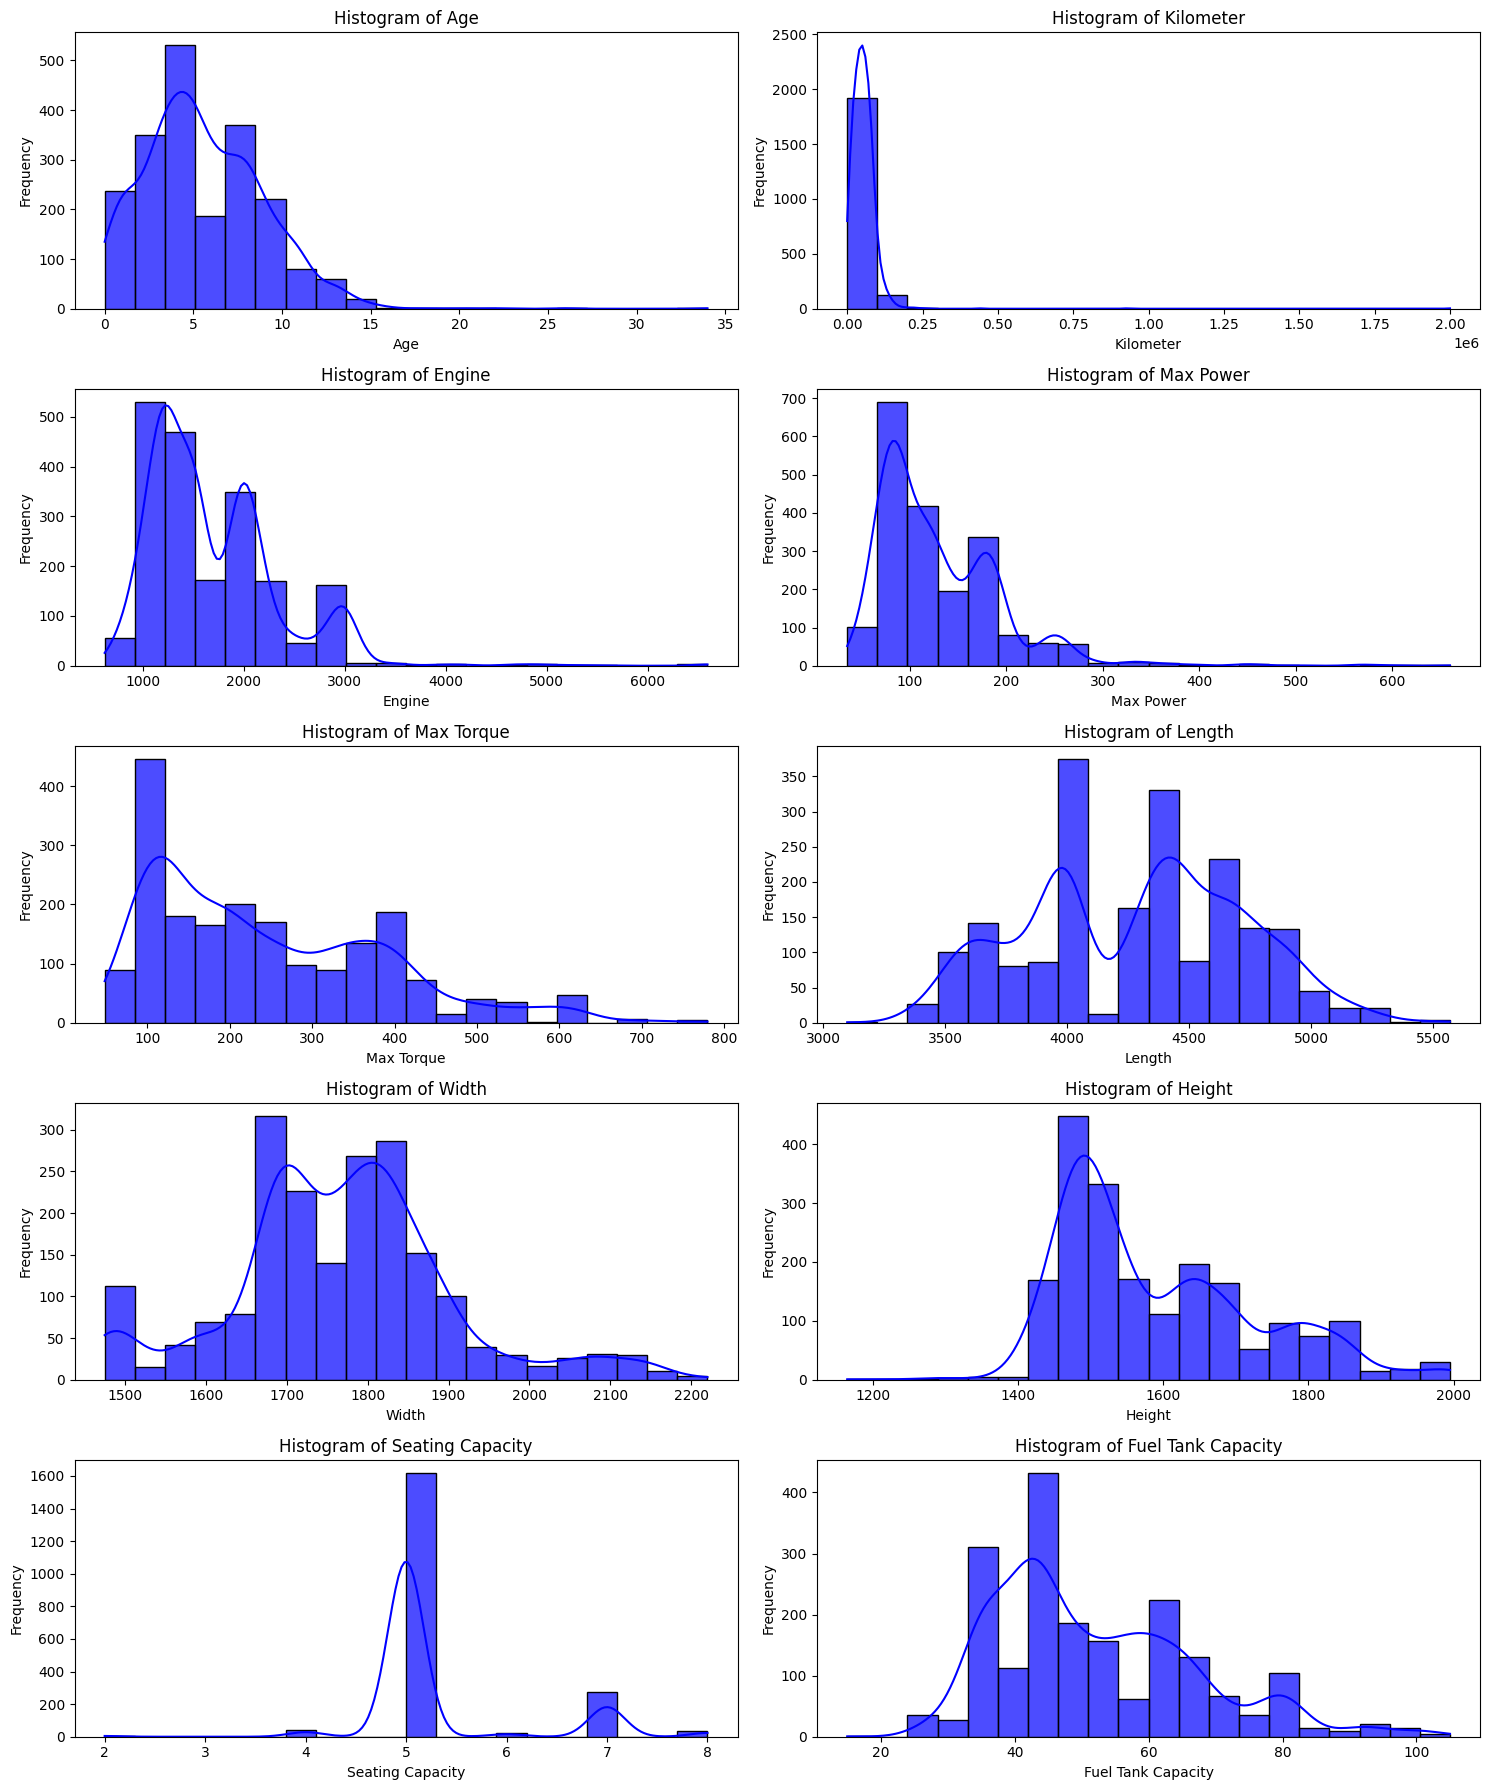

In [39]:
# Define the list of features to plot
features_SC = [
    "Age", "Kilometer", "Engine", "Max Power", "Max Torque",
    "Length", "Width", "Height", "Seating Capacity", "Fuel Tank Capacity"
] #Include seating capacity

# Create histograms for each feature in the list
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a histogram for each
for i, feature in enumerate(features_SC, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Plot the histogram for the feature
    sns.histplot(df3[feature], bins=20, kde=True, color="blue", alpha=0.7)
    
    # Set labels and title for each plot
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

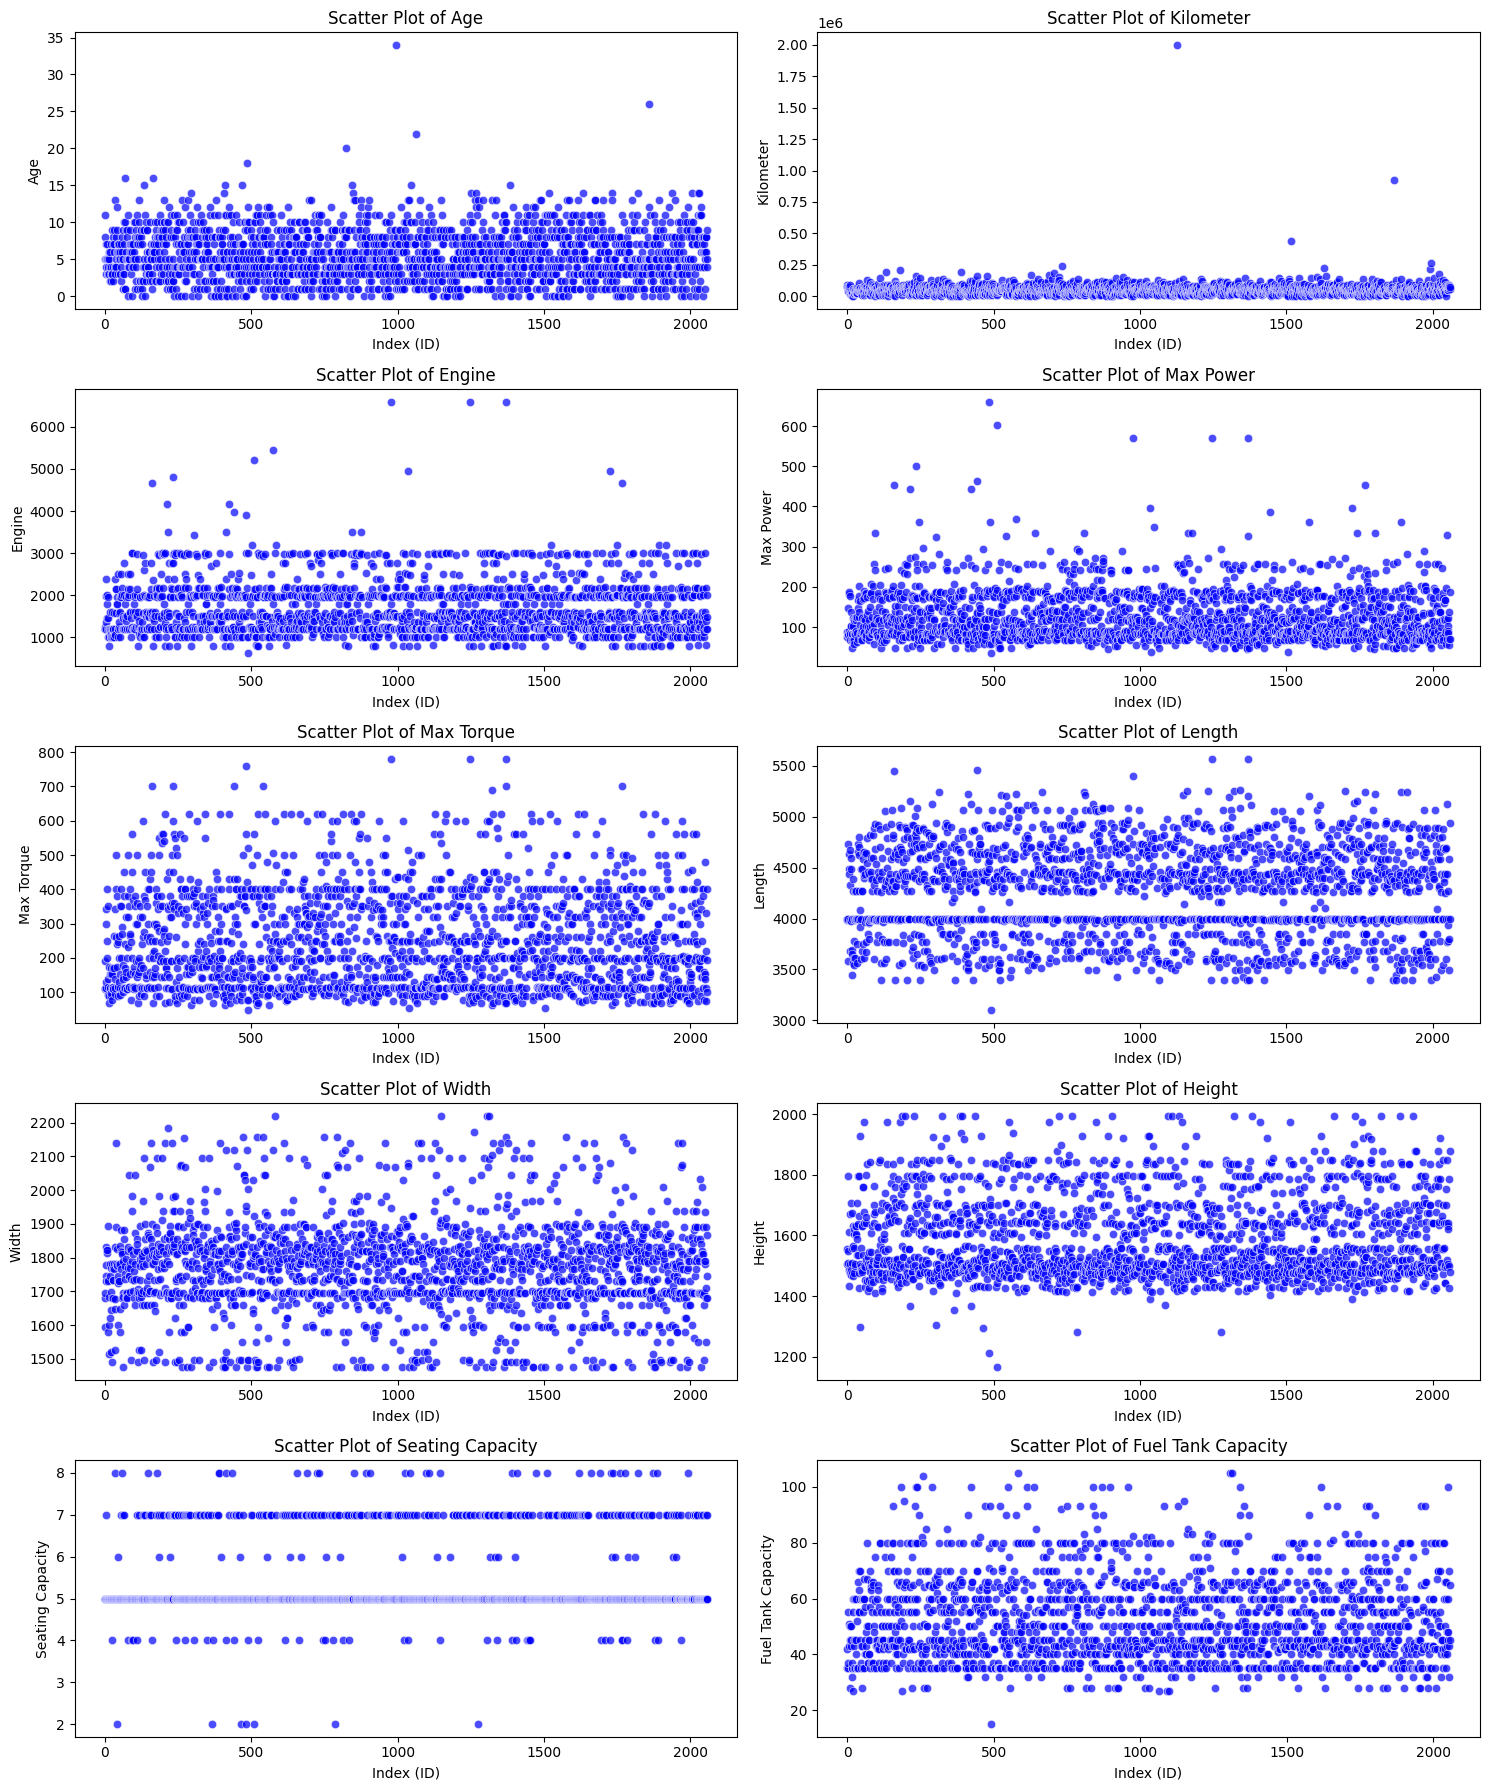

In [40]:
# Create scatter plots for each feature
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a scatter plot for each
for i, feature in enumerate(features_SC, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Create scatter plot for each feature vs Index (ID)
    sns.scatterplot(x=df2.index, y=df3[feature], alpha=0.7, color="blue")
    
    # Set labels and title for each plot
    plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
    plt.ylabel(feature)
    plt.title(f"Scatter Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

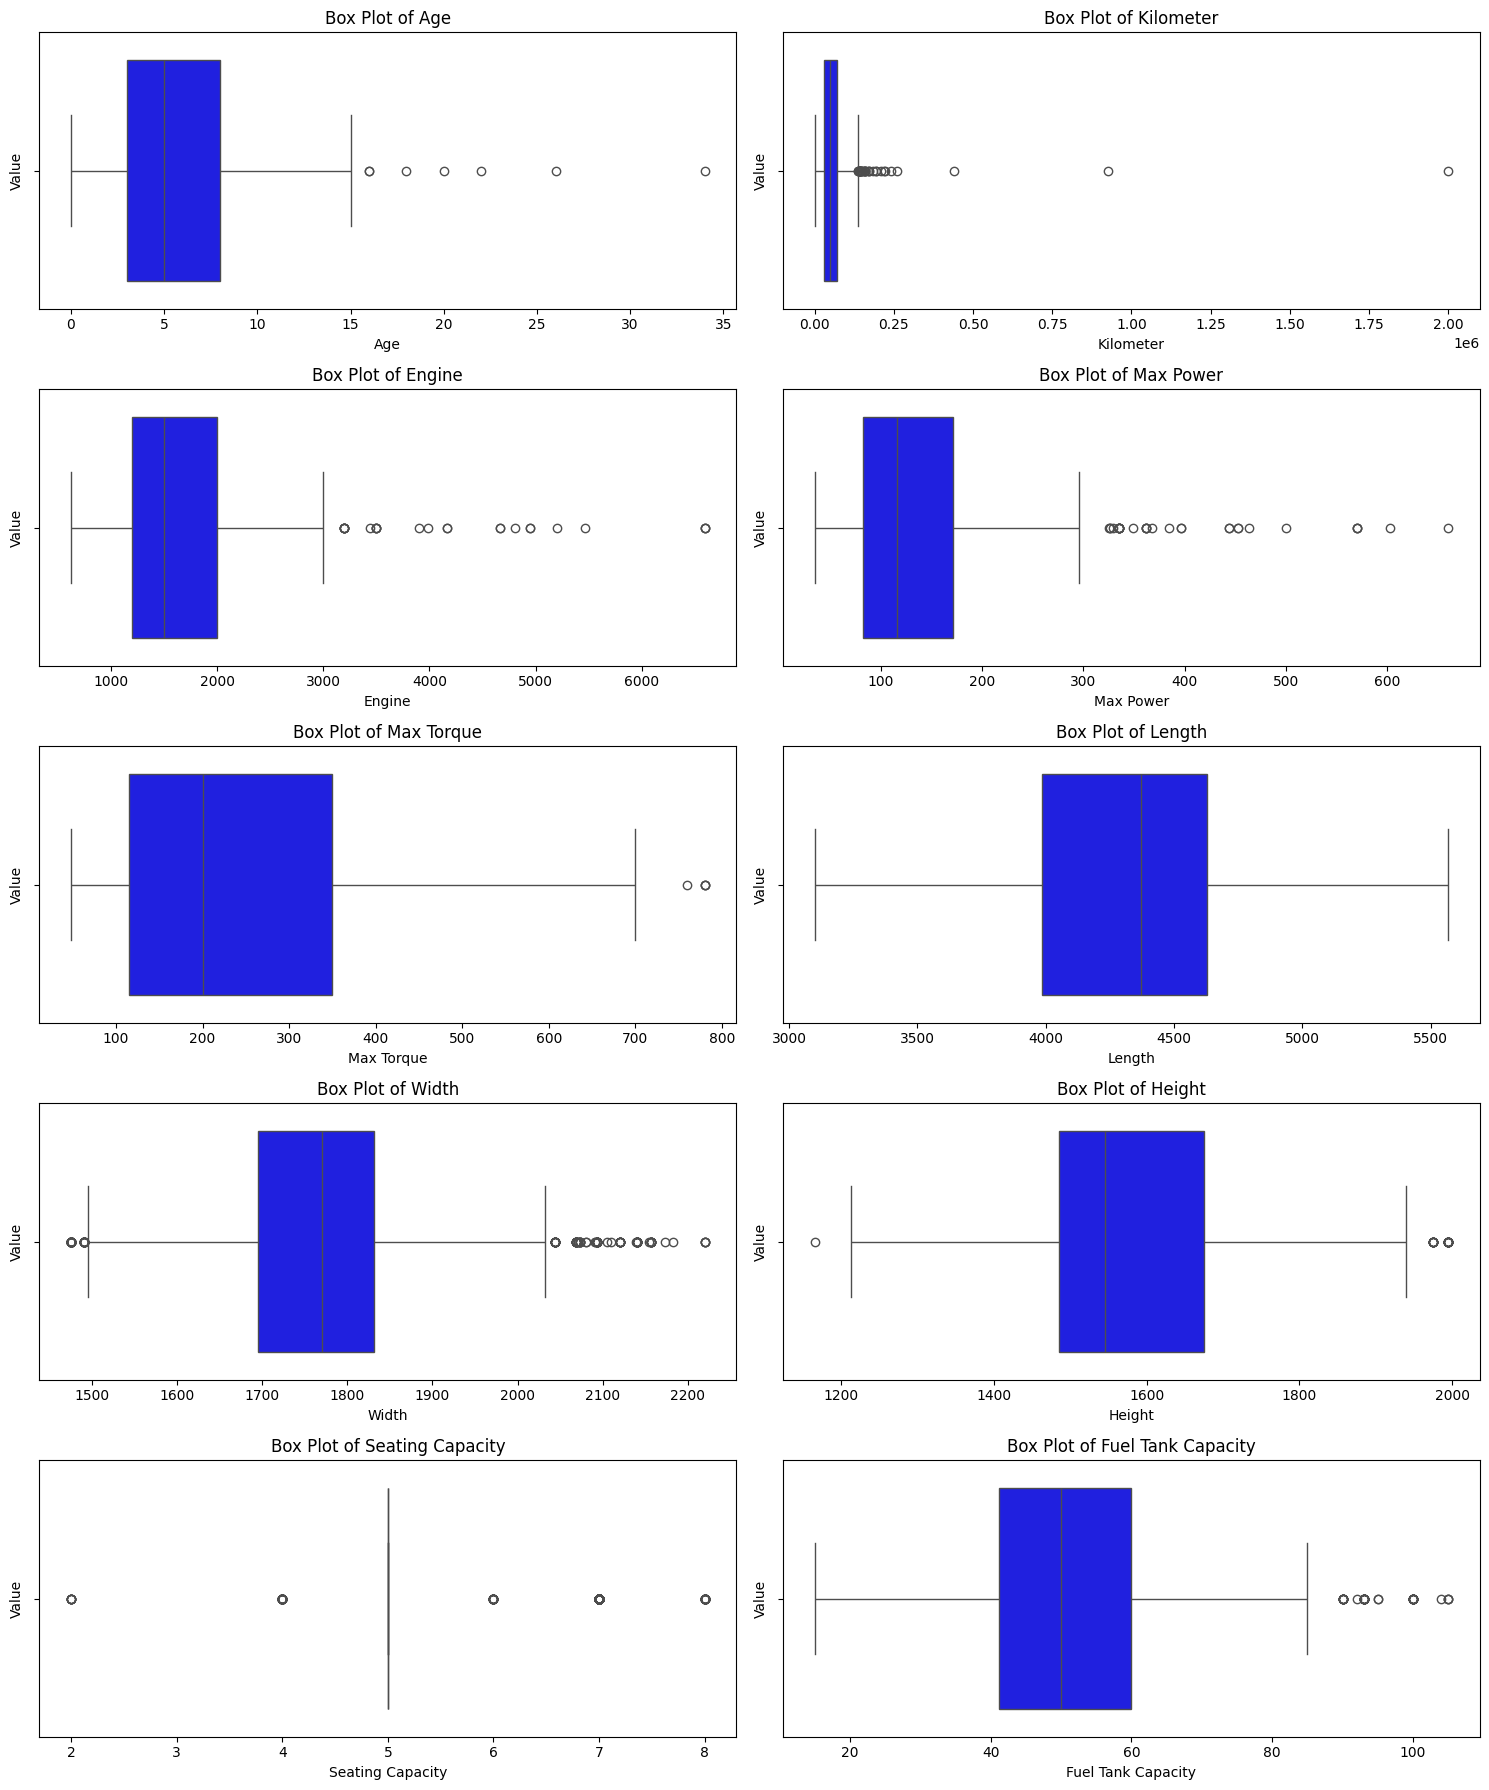

In [41]:
# Create box plots for each feature in the list
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a box plot for each
for i, feature in enumerate(features_SC, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Plot the box plot for the feature
    sns.boxplot(x=df3[feature], color="blue")
    
    # Set labels and title for each plot
    plt.xlabel(feature)
    plt.ylabel("Value")
    plt.title(f"Box Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

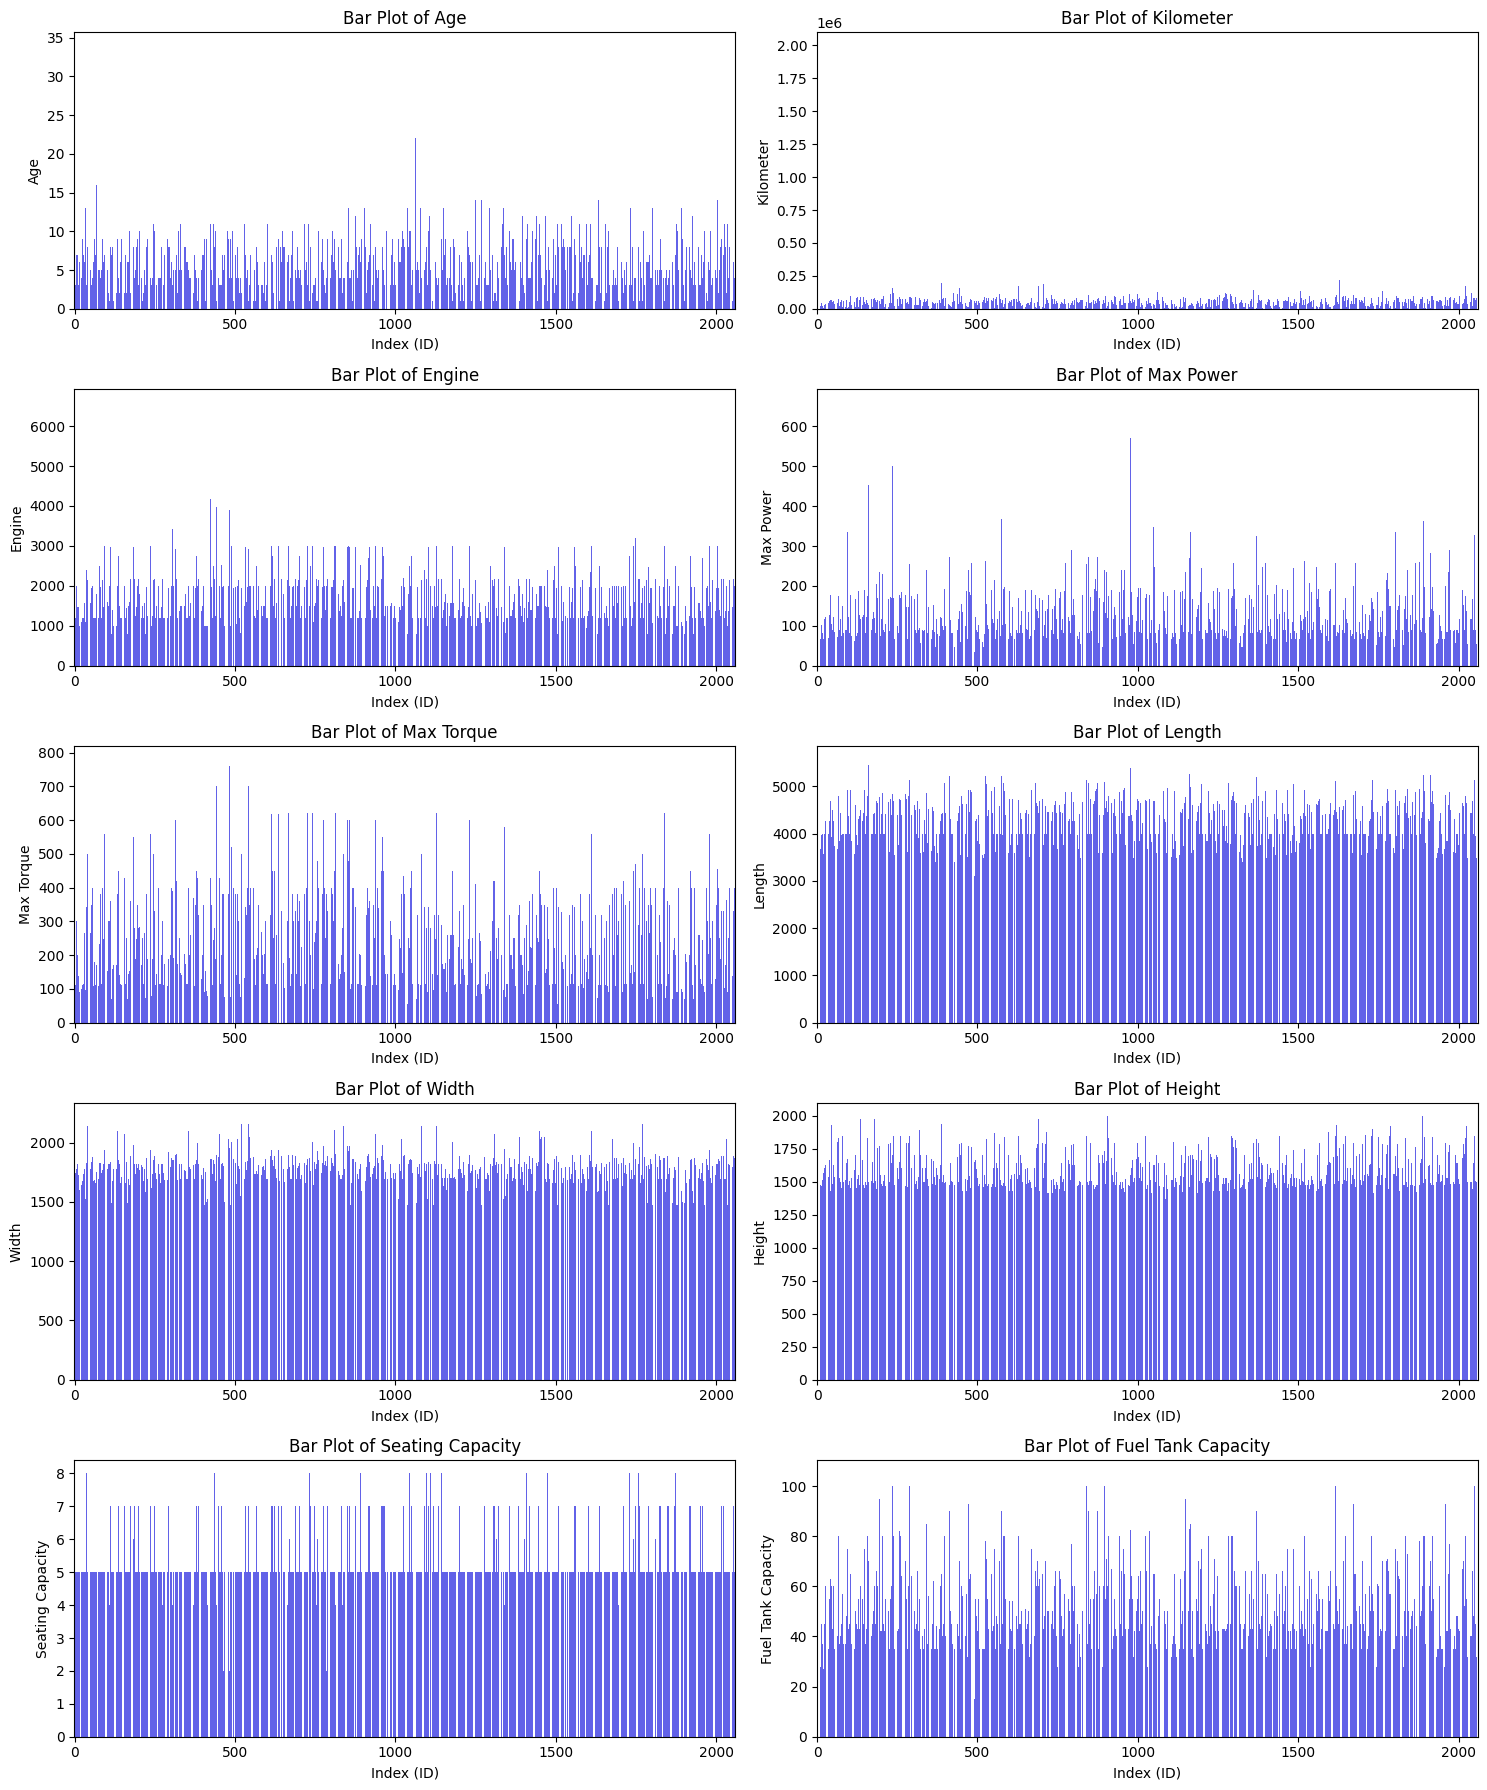

In [42]:
# Create bar plots for each feature
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a bar plot for each
for i, feature in enumerate(features_SC, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Create bar plot for each feature vs Index (ID)
    sns.barplot(x=df2.index, y=df3[feature], color="blue", alpha=0.7)
    
    # Set labels and title for each plot
    plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
    plt.ylabel(feature)
    plt.title(f"Bar Plot of {feature}")

    # Set custom x-axis ticks (only show a subset of indices like 0, 500, 1000, ...)
    tick_interval = 500  # Change this number if you want a different interval
    max_index = df2.index[-1]  # Get the last index in the dataset
    plt.xticks(ticks=range(0, max_index, tick_interval))  # Set x-ticks at the interval

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

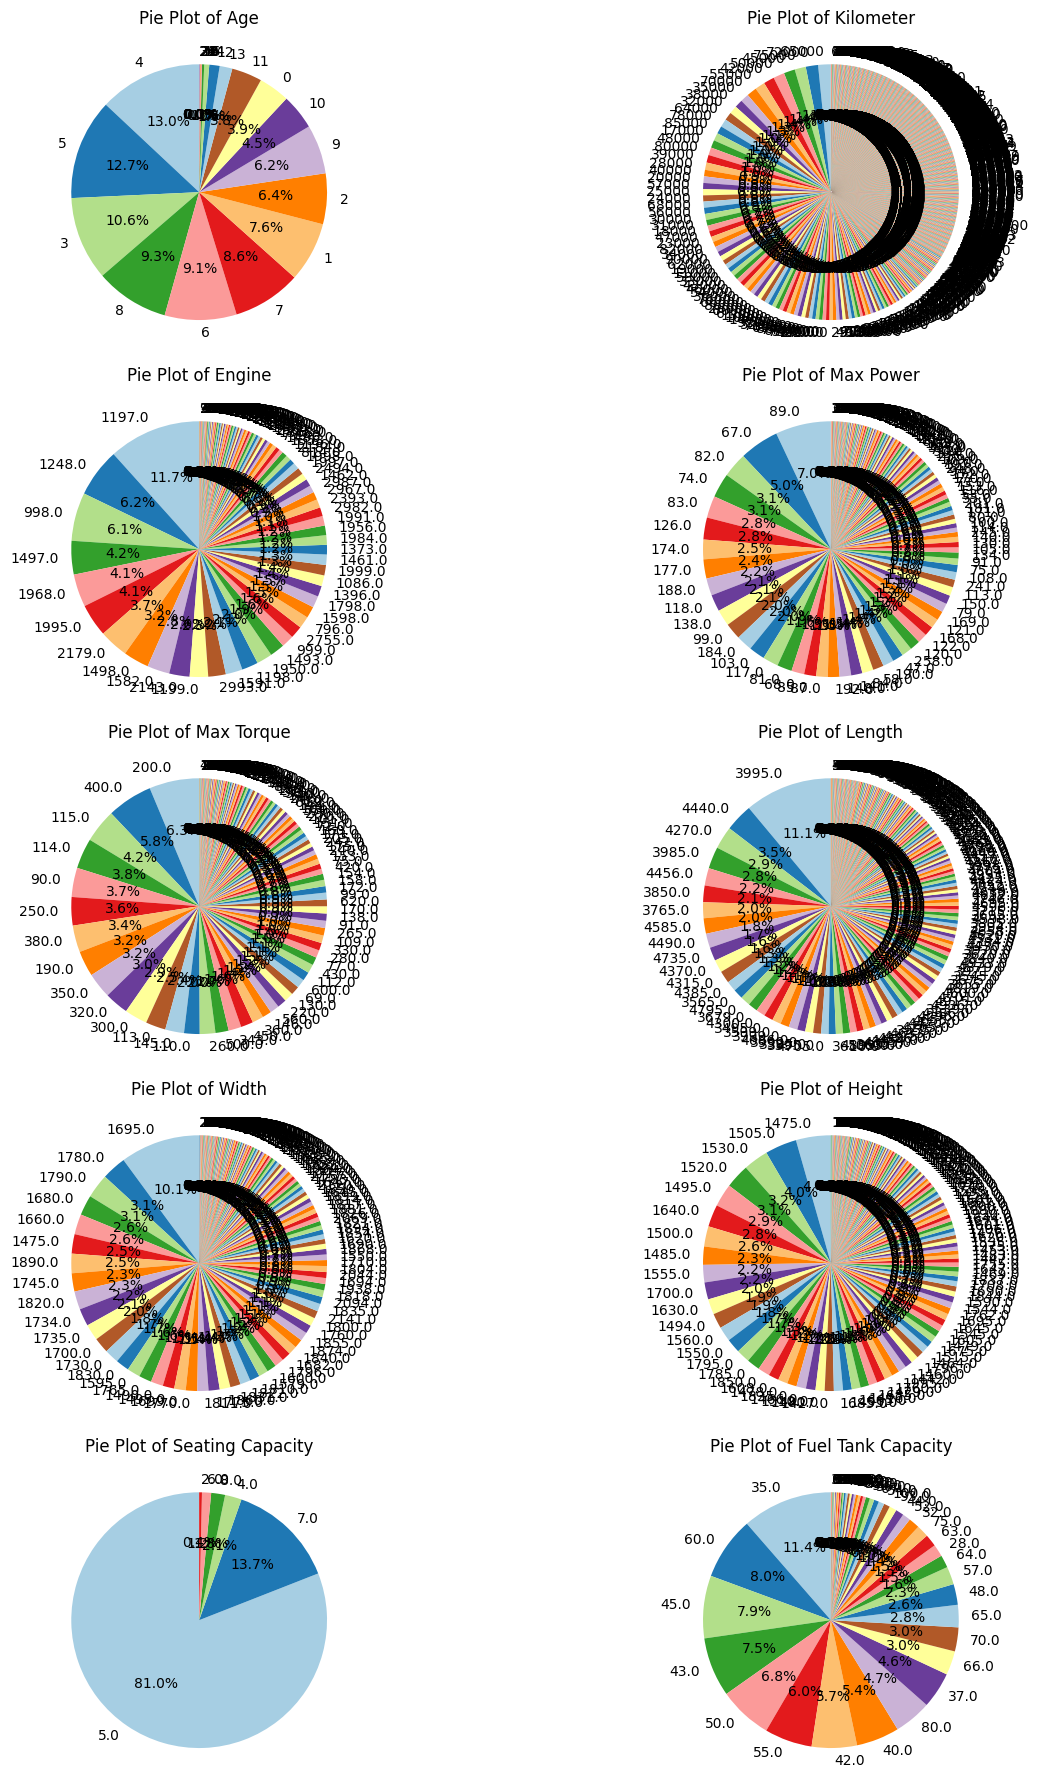

In [43]:
# Create pie charts for each feature
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each categorical feature in the list and create a pie chart for each
for i, feature in enumerate(features_SC, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid

    # Count the occurrences of each category in the feature
    feature_counts = df3[feature].value_counts()

    # Create the pie plot
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    
    # Set the title for each pie plot
    plt.title(f"Pie Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Define the object columns you want to encode
object_column = [
    'Model', 'Fuel Type', 'Transmission', 'Location', 
    'Color', 'Owner', 'Seller Type', 'Drivetrain'
]  # Not include make

# Create histograms for each feature in the list
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a histogram for each
for i, feature in enumerate(object_column, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Plot the histogram for the feature
    sns.histplot(df2[feature], bins=20, kde=True, color="blue", alpha=0.7)
    
    # Set labels and title for each plot
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")
    
    # Ensure x-ticks show only integer values for Model feature (100's) and Location feature (10's)
    if feature == 'Model':
        plt.xticks(range(int(df2[feature].min()), int(df2[feature].max()) + 1, 100))
    elif feature == 'Location':
        plt.xticks(range(int(df2[feature].min()), int(df2[feature].max()) + 1, 10))
    else:
        plt.xticks(sorted(df2[feature].unique()))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Create scatter plots for each feature
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a scatter plot for each
for i, feature in enumerate(object_column, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Create scatter plot for each feature vs Index (ID)
    sns.scatterplot(x=df2.index, y=df2[feature], alpha=0.7, color="blue")
    
    # Set labels and title for each plot
    plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
    plt.ylabel(feature)
    plt.title(f"Scatter Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Create box plots for each feature in the list
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a box plot for each
for i, feature in enumerate(object_column, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Plot the box plot for the feature
    sns.boxplot(x=df2[feature], color="blue")
    
    # Set labels and title for each plot
    plt.xlabel(feature)
    plt.ylabel("Value")
    plt.title(f"Box Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Create bar plots for each feature
plt.figure(figsize=(15, 18))  # Adjust the figure size to accommodate all subplots

# Iterate through each feature in the list and create a bar plot for each
for i, feature in enumerate(object_column, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid
    
    # Create bar plot for each feature vs Index (ID)
    sns.barplot(x=df2.index, y=df2[feature], color="blue", alpha=0.7)
    
    # Set labels and title for each plot
    plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
    plt.ylabel(feature)
    plt.title(f"Bar Plot of {feature}")
    
    # Set custom x-axis ticks (only show a subset of indices like 0, 500, 1000, ...)
    tick_interval = 500  # Change this number if you want a different interval
    max_index = df2.index[-1]  # Get the last index in the dataset
    plt.xticks(ticks=range(0, max_index, tick_interval))  # Set x-ticks at the interval

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Create pie charts for each feature
plt.figure(figsize=(20, 20))  # Adjust the figure size to accommodate all subplots

# Iterate through each categorical feature in the list and create a pie chart for each
for i, feature in enumerate(object_column, 1):
    plt.subplot(5, 2, i)  # Arrange the plots in a 5x2 grid

    # Count the occurrences of each category in the feature
    feature_counts = df2[feature].value_counts()

    # Create the pie plot
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    
    # Set the title for each pie plot
    plt.title(f"Pie Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Define the target column
target_column = "Price"

# Define the independent numerical variables
features_SC = [
    "Year", "Kilometer", "Engine", "Max Power", "Max Torque",
    "Length", "Width", "Height", "Seating Capacity", "Fuel Tank Capacity"
] #Include Seating Capacity

# Create histograms
plt.figure(figsize=(12, 18))  # Adjusted figure size for better spacing

# Iterate through the features and create histograms for the feature vs the target
for i, feature in enumerate(features_SC, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid
    
    # Plot the histogram for the feature vs the target column
    sns.histplot(data=df2, x=feature, y=target_column, bins=20, kde=True, color="blue", alpha=0.7)
    
    # Set labels and title for each plot
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f"Histogram of {feature} vs {target_column}")
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Create a scatter plot for each feature vs the target
plt.figure(figsize=(12, 18))

for i, f in enumerate(features_SC):
    plt.subplot(5, 2, i+1)  # Arrange the plots in a 5x2 grid
    sns.scatterplot(x=df2[f], y=df2[target_column], alpha=0.5)
    
    # Set labels and title for each plot
    plt.xlabel(f)
    plt.ylabel(target_column)
    plt.title(f"Scatter Plot of {f} vs {target_column}")
    
    # Format the Y-axis in Millions (M)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [ ]:
# Define the independent numerical variables
features = [
    "Year", "Kilometer", "Engine", "Max Power", "Max Torque",
    "Length", "Width", "Height", "Fuel Tank Capacity"
] #Not include Seating Capacity

# Number of bins (quantiles) you want to divide each feature into
num_bins = 8

# Create the box plots
plt.figure(figsize=(12, 18))

# Iterate through the features and create box plots for grouped features
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid
    
    # Apply pd.qcut to create automatic groups based on quantiles
    # We use qcut to divide the feature into `num_bins` groups based on quantiles
    df2[feature + " Group"] = pd.qcut(df2[feature], q=num_bins, labels=[f'Group {i+1}' for i in range(num_bins)])
    
    # Plot the boxplot for the grouped feature against the target
    sns.boxplot(x=df2[feature + " Group"], y=df2[target_column])
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f"Box Plot of {feature} vs {target_column}")
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

plt.tight_layout()
plt.show()


In [ ]:
#Define the independent numerical variables
feature = ["Seating Capacity"
]

# Create the box plots
plt.figure(figsize=(12, 18))

for i, feature in enumerate(feature, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid
    sns.boxplot(x=df2[feature], y=df2[target_column])
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f"Box Plot of {feature} vs {target_column}")
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))


plt.tight_layout()
plt.show()

In [ ]:
# Create the bar plots
plt.figure(figsize=(12, 18))

# Iterate through the features and create bar plots for grouped features
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid
    
    # Apply pd.qcut to create automatic groups based on quantiles
    # We use qcut to divide the feature into `num_bins` groups based on quantiles
    df2[feature + " Group"] = pd.qcut(df2[feature], q=num_bins, labels=[f'Group {i+1}' for i in range(num_bins)])
    
    # Compute the mean price for each group
    group_means = df2.groupby(feature + " Group")[target_column].mean().reset_index()
    
    # Plot the bar plot for the grouped feature against the target (mean of Price)
    sns.barplot(x=feature + " Group", y=target_column, data=group_means, alpha=0.7)
    
    # Set labels and title for each plot
    plt.xlabel(f"Quantile Groups of {feature}")
    plt.ylabel(target_column)
    plt.title(f"Bar Plot of {feature} vs {target_column}")
    
    # Format the Y-axis in Millions (M)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Create a bar plot for each feature vs the target
plt.figure(figsize=(12, 18))

for i, f in enumerate(feature):
    plt.subplot(5, 2, i+1)  # Arrange the plots in a 5x2 grid
    
    # Use sns.barplot() to plot the mean of the target variable for each feature
    # In this case, we group by the feature and compute the mean of the target variable
    sns.barplot(x=df2[f], y=df2[target_column], estimator="mean", ci=None, alpha=0.7)
    
    # Set labels and title for each plot
    plt.xlabel(f)
    plt.ylabel(target_column)
    plt.title(f"Bar Plot of {f} vs {target_column}")
    
    # Format the Y-axis in Millions (M)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Create pie charts
plt.figure(figsize=(18, 27))

# Iterate through the features and create pie charts for grouped features
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid
    
    # Apply pd.qcut to create automatic groups based on quantiles
    # We use qcut to divide the feature into `num_bins` groups based on quantiles
    df2[feature + " Group"] = pd.qcut(df2[feature], q=num_bins, labels=[f'Group {i+1}' for i in range(num_bins)])
    
    # Calculate the total price for each group
    group_total_price = df2.groupby(feature + " Group")[target_column].sum()
    
    # Plot the pie chart for the price distribution across the quantile groups
    plt.pie(group_total_price, labels=group_total_price.index, autopct='%1.1f%%', startangle=90)
    
    # Set the title for each plot
    plt.title(f"Pie Chart of {feature} vs {target_column} Distribution")
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Create pie plots
plt.figure(figsize=(4, 6))

for i, f in enumerate(feature):
    plt.subplot(1, 1, 1)  # Only one pie plot, so we do not need multiple subplots
    
    # Group by the feature and calculate the total price for each group
    group_total_price = df2.groupby(f)[target_column].sum()

    # Plot the pie chart for the price distribution across the categories
    plt.pie(group_total_price, labels=group_total_price.index, autopct='%1.1f%%', startangle=90)
    
    # Set the title for the pie plot
    plt.title(f"Pie Chart of {f} vs {target_column} Distribution")
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Define the x6 column
column_x6 = "Fuel Type"

# Create a histogram for the 'Fuel Type' variable
plt.figure(figsize=(10, 5))  # Adjust the size of the figure

# Plot the histogram
sns.histplot(df2[column_x6], bins=20, kde=True, color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel(column_x6)
plt.ylabel("Frequency")
plt.title(f"Histogram of {column_x6}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the scatter plot with Fuel Type as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Create scatter plot for Fuel Type vs the index (ID) of the dataset
sns.scatterplot(x=df2.index, y=df2[column_x6], alpha=0.7, color="blue")

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(column_x6)
plt.title(f"Scatter Plot of {column_x6}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the box plot for Fuel Type
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the box plot for the x6 column
sns.boxplot(x=df2[column_x6], color="blue")

# Set labels and title for the plot
plt.xlabel(column_x6)
plt.title(f"Box Plot of {column_x6}")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create the bar plot with Fuel Type as y and Index as x
plt.figure(figsize=(10, 5))  # Adjust the figure size

# Plot the bar plot for Fuel Type vs Index (ID)
sns.barplot(x=df2.index, y=df2[column_x6], color="blue", alpha=0.7)

# Set labels and title for the plot
plt.xlabel("Index (ID)")  # This represents the row numbers of the dataset
plt.ylabel(column_x6)
plt.title(f"Bar Plot of {column_x6}")

# Set custom x-axis ticks (only show a subset of indices like 0, 500, 1000, ...)
tick_interval = 500  # Change this number if you want a different interval
max_index = df2.index[-1]  # Get the last index in the dataset
plt.xticks(ticks=range(0, max_index, tick_interval))  # Set x-ticks at the interval

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Count the occurrences of each unique value in the column
counts = df2[column_x6].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Set the title
plt.title(f"Pie Plot of {column_x6}")

# Show the plot
plt.show()
